In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from scipy.stats import pearsonr, spearmanr, kendalltau
import seaborn as sns
pd.set_option('future.no_silent_downcasting', True)

# Economic, Governance, and Educational Drivers of University Rankings: A Comparative and Correlational Study (2017–2022)



### Author Ivan Georgiev Georgiev 

## Abstract 

This study examines the relationship between national economic, governance, and educational indicators and the performance of countries in the QS World University Rankings from 2017 to 2022. Focusing on the top ten countries by total score each year, it compares their standings with the top ten countries ranked by gross domestic product (GDP), government effectiveness, research and development (R&D) expenditure, and government spending on education. The analysis is further extended to include primary, secondary, and tertiary school enrolment rates as additional educational metrics. Relationships between these indicators and QS total scores are examined using Pearson’s, Spearman’s, and Kendall’s correlation methods to assess the strength and direction of the associations between these indicators and QS total scores. The findings provide insight into whether strong economic performance and governance are directly linked to higher education quality as reflected in global rankings, and identify the factors most strongly associated with national academic excellence.

## Introduction 

University rankings, such as the QS World University Rankings, are widely regarded as key benchmarks of educational quality and global academic competitiveness. Countries that consistently host top-performing institutions often emerge as knowledge hubs, attracting international students, faculty, and investment. As such, understanding the drivers behind a nation’s ranking performance is not only valuable for higher education policy but also for long-term socio-economic planning.

While many analyses focus on institutional-level performance, there is growing interest in how national contexts influence global rankings. Economic strength—reflected in indicators such as gross domestic product (GDP) often signals a country’s capacity to invest in education, research, and infrastructure. Governance quality, measured through indices such as government effectiveness, may affect the efficiency of these investments, while educational factors such as enrolment rates across primary, secondary, and tertiary levels—capture the breadth of a nation’s human capital pipeline.

University rankings have become an influential benchmark for assessing higher education systems worldwide, shaping perceptions of academic quality, research productivity, and global competitiveness. The QS World University Rankings evaluate institutions on different criteria including academic reputation, research impact, faculty–student ratio, and internationalization. However, the extent to which these measures reflect broader national conditions remains an open question. 

This study investigates the relationship between national economic, governance, and educational indicators and the performance of countries in the QS World University Rankings between 2017 and 2022. To ensure a consistent and comparable sample across years, the analysis focuses on the top 300 universities in each annual ranking. This selection captures a broad representation of high-performing institutions while maintaining data quality and reducing the influence of smaller, less comparable entries.

The analysis examines the top ten countries by QS total score in each year and compares them to the top ten countries ranked by key macroeconomic and governance indicators: gross domestic product (GDP), government effectiveness, research and development (R&D) expenditure, and government spending on education. Additionally, primary, secondary, and tertiary school enrolment rates are incorporated to provide a more comprehensive view of national educational ecosystems.

The research is structured in two main parts. The first part is a comparative analysis of rankings across these indicators, highlighting overlaps and discrepancies between countries leading in higher education and those excelling economically or in governance. The second part applies classical statistical correlation techniques  Pearson’s correlation coefficient, Spearman’s rank correlation, and Kendall’s tau to quantify relationships between the QS total score and each indicator. We believe that this combined approach provides both descriptive and inferential insights, clarifying how national conditions align with global academic performance.

Motivation University rankings play a critical role in shaping international education policy, research funding, and student decision-making. While many analyses focus on institutional performance, this project shifts the lens to the country level, offering insights into how macroeconomic and social conditions influence national academic outcomes.

- Motivation. University rankings shape international education policy, research funding priorities, and student decision-making. By shifting the focus to the country level, this study offers a broader perspective on how macroeconomic and governance factors influence national academic outcomes.

- Research Question. To what extent do indicators such as GDP per capita, government effectiveness, and R&D investment correlate with national performance in the QS World University Rankings?

- Significance. Identifying the macro-level drivers of academic performance can guide policy, foster international collaboration, and inform investment strategies. The findings may also help anticipate changes in global competitiveness, highlighting which countries are poised to advance—or decline—in the coming years.

## Previous Work Preview 

Research on the determinants of university rankings has examined economic, governance, and educational dimensions, often linking macro-level national characteristics to higher education outcomes. Previous studies have explored how a country’s wealth, governance quality, research investment, and policy initiatives influence its representation in global rankings such as QS, THE, and ARWU. This literature is directly relevant to the present study, as it provides both empirical evidence and methodological approaches for assessing how national contexts affect academic performance. Moreover, critical perspectives on the limitations of rankings offer necessary caution when interpreting these measures in relation to broader socio-economic and educational realities.

In summary, prior research underscores several recurring themes:
- Strong links between higher education excellence and GDP per capita, particularly via broader (rather than elite) university presence. Telias (2014) examined 2013 ARWU data for universities ranked in the top 100–500, finding a strong positive correlation between the number of top 500 universities per capita and GDP per capita—stronger than for top 100 universities. The study concluded that broader “decent” university systems are more closely linked to economic outcomes than a small elite tier. It also highlighted “freedom from corruption” as a key complementary institutional factor, while finding no link between university presence and GDP growth. Also, 
Lu (2014) reached similar conclusions using ARWU data, reporting that GDP per capita is strongly associated with the number of universities in global rankings, but GDP growth is not. Pietrucha (2018), through regression analysis across ARWU, THE, and QS rankings, found that GDP, R&D expenditure, education spending per tertiary student, and governance quality (e.g., government effectiveness) are significant determinants of university ranking scores. Recentlly, Agasisti & Bertoletti (2022) analyzed Universitas 21 National Higher Education System Rankings and found that GDP per capita and R&D expenditure (% of GDP) were significant predictors of system-level ranking performance, along with non-economic factors such as institutional connectivity and regulatory quality.

- Governance and institutional quality significantly shape both economic and educational performance.
Kaufmann, Kraay, & Mastruzzi (2011) developed the Worldwide Governance Indicators (WGI) framework, widely used to measure governance quality, including government effectiveness, rule of law, and corruption control—factors repeatedly linked to development and educational outcomes. In his study, Pietrucha (2018) explicitly included governance indicators in his models, confirming that government effectiveness is a significant determinant of university ranking scores, often in combination with economic capacity. Whetsell et al. (2019) found that democratic governance is positively correlated with national scientific performance, with the relationship moderated by factors such as economic complexity and globalization.

- Research funding, R&D investment, and institutional size as drivers of ranking performance.
Benito et al. (2019), analyzing QS top 300 universities, found that public funding levels explain up to 51% of variance in ranking position, with top 100 universities having two to three times the funding of lower tiers. Public funding was critical for 84% of top universities, especially in Europe, while private funding played a lesser role. Meo et al. (2013), focusing on 40 Asian countries from 1996–2011, found strong correlations between research outputs (publications, citations, H-index) and R&D spending, number of universities, and indexed journals, but no significant link with GDP per capita.Prathap (2014) reinforced these findings globally, reporting strong positive correlations between R&D expenditure and both academic outputs and rankings.Guo (2023) provided evidence from a policy perspective, showing that national higher education initiatives can raise QS rankings by 12–17 places on average, with even larger gains in ARWU—particularly in Asia-Pacific countries.

## Correlation  Methods General Principles 

In order to quantify the relationships between the QS total score and the selected economic and educational indicators, this study applies three complementary correlation measures: Pearson’s $r$, Spearman’s $ρ$, and Kendall’s $τ$. Each method captures different aspects of association between variables and helps ensure that results are robust to differences in scale, distribution, and relationship form. 

### Pearson Correlation Coefficient 
The Pearson correlation coefficient $r$ measures the strength and direction of the linear relationship between two quantitative variables.

Strength: How closely the points cluster around a straight line.

Direction: Whether the variables increase together (positive) or one increases while the other decreases (negative).

Its value lies in the range: $ −1≤r≤1 $ 
- r = 1: perfect positive linear relationship 
- r = −1: perfect negative linear relationship
- r = 0: no linear correlation

**Definition** 

Let’s say we have two variables:

$$
X = (x_1, x_2, \dots, x_n)
$$
$$
Y = (y_1, y_2, \dots, y_n)
$$

with sample size $n$.

The Pearson correlation coefficient, denoted as $r$, measures the strength and direction of a $\mathbf{linear}$ relationship between two continuous variables. Its value lies within the interval $[-1, 1]$, where $r = +1$ indicates perfect positive correlation, $r = -1$ indicates perfect negative correlation, and $r = 0$ indicates no linear correlation.


\begin{equation}
r = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}
{\sqrt{\sum_{i=1}^{n} (x_i - \bar{x})^2} \cdot \sqrt{\sum_{i=1}^{n} (y_i - \bar{y})^2}}
\end{equation}
where $x_i, y_i$ are paired observations, and $\bar{x}, \bar{y}$ denote their respective means.

This formula has three parts:

(a) Covariance
The numerator: 

$$
\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})
$$

This is proportional to the sample covariance between $( X $) and $( Y $):

$
\mathrm{Cov}(X, Y) = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{n - 1}
$

Covariance measures how two variables vary together:

Positive → when $X$ is above its mean, $Y$ tends to be above its mean.

Negative → when $X$ is above its mean, $X$ tends to be below its mean. 

(b) Normalization (Standard Deviations)

The denominator:

$$
\sqrt{\sum_{i=1}^{n} (x_i - \bar{x})^2} \cdot \sqrt{\sum_{i=1}^{n} (y_i - \bar{y})^2}
$$

is proportional to:

$$
(n - 1) \cdot s_X \cdot s_Y
$$

where:

$$
s_X = \sqrt{\frac{\sum_{i=1}^{n} (x_i - \bar{x})^2}{n - 1}}
$$
is the sample standard deviation of $( X $),

$$
s_Y = \sqrt{\frac{\sum_{i=1}^{n} (y_i - \bar{y})^2}{n - 1}}
$$
is the sample standard deviation of $( Y $).

Dividing the covariance by $s_X$ $s_Y$ standardizes it, making $r$ unitless and bounded between -1 and 1. 

- The Full Relationship   

Combining the ideas:

$$
r = \frac{\mathrm{Cov}(X, Y)}{s_X \cdot s_Y}
$$

This shows that $( r $) is the \mathbf{normalized covariance}.

- Principles Behind $r$

 - Unit-Free Measure
Covariance depends on the units (e.g., meters × seconds).

Pearson’s $r$ divides by the product of the standard deviations, removing units and allowing comparisons across datasets.

 - Centering Around the Mean
We measure deviations from the mean, not raw values.

This ensures the coefficient reflects relative movements.

 - Linearity Assumption $r$ only captures linear relationships. 

Two variables can have $r≈0$ but still have a strong nonlinear relationship.

Assumptions:
- Linear relationship between variables.
- Continuous and normally distributed variables.
- Homoscedasticity (equal variance across the range).

Relevance:

In this project, Pearson’s $r$ will help determine whether changes in an indicator (e.g., GDP per capita) are proportionally associated with changes in QS total score. In the context of this study, Pearson's $r$ identifies whether indicators such as GDP per capita or literacy rate exhibit a direct proportionality with the QS $\mathbf{total\_score}$. 

### Spearman’s Rank Correlation Coefficient 
The Spearman correlation measures the monotonic relationship between two variables, based on ranked data.
It is less sensitive to outliers and does not assume a linear relationship. Spearman’s $\rho$ is a non-parametric measure that assesses the strength and direction of a $\mathbf{linear}${monotonic} relationship between two variables, without assuming linearity. It operates on the ranked values of the data.

\begin{equation}
\rho = 1 - \frac{6 \sum_{i=1}^{n} d_i^2}{n(n^2 - 1)}
\end{equation}
where $d_i = R(x_i) - R(y_i)$ is the difference between the ranks of $x_i$ and $y_i$, and $n$ is the number of observations. 

Properties:
- ρ=1: perfect positive monotonic relationship.
- ρ=−1: perfect negative monotonic relationship. 
- ρ≈0: no monotonic relationship.

Advantages:

Works with ordinal data or when the variables do not meet normality assumptions. Captures non-linear but monotonic relationships. In this project, Spearman’s $\rho$ is useful when increases in an economic or educational indicator correspond to increases in QS rankings, but not necessarily in a proportional manner.

### Kendall’s Tau 
Kendall’s tau is a non-parametric measure of the strength and direction of association between two variables, based on the concordance and discordance of pairs. Kendall’s $\tau$ is another rank-based correlation measure that evaluates the correspondence between the orderings of two datasets by counting concordant and discordant pairs.

Let $C$ be the number of concordant pairs and $D$ the number of discordant pairs:

\begin{equation}
\tau = \frac{C - D}{\frac{1}{2}n(n-1)}
\end{equation}

A pair $(x_i, y_i)$ and $(x_j, y_j)$ is \textit{concordant} if $(x_i - x_j)(y_i - y_j) > 0$, and \textit{discordant} if $(x_i - x_j)(y_i - y_j) < 0$.

Kendall’s $\tau$ is particularly appropriate for assessing the similarity of country rankings across QS scores and other indicators.

Interpretation: 
- τ=1: perfect agreement in ranking. 
- τ=−1: perfect disagreement in ranking. 
- τ=0: no association.

Advantages:

More robust to small sample sizes than Pearson’s $r$ and Spearman’s $ρ$. Particularly useful when data contain many tied ranks. 

Each method addresses a different type of relationship:

- Pearson’s $r$ — linear relationships, sensitive to magnitude.

- Spearman’s $ρ$ — monotonic relationships, based on ranks.

- Kendall’s $τ$ — rank agreement, robust to small samples and ties.

Using all three ensures a comprehensive understanding of how economic, governance, and educational factors relate to QS rankings. These methods together offer a comprehensive view of the relationships between national-level economic and educational performance and global university rankings.

### Top-20 Comparative Overlap

To evaluate the similarity between the top-performing countries by QS $\mathbf{linear}${total\_score} and those ranked highly in a given indicator, the \textbf{overlap percentage} is calculated:

\begin{equation}
\text{Overlap\%} = \frac{|T_Q \cap T_I|}{10} \times 100
\end{equation}
where $T_Q$ is the set of top 10 countries by QS score, and $T_I$ is the set of top 10 countries by a given indicator.

This metric provides a direct measure of elite-set similarity between the QS rankings and indicator-based rankings.

### Data Standardization

Since economic and educational indicators are measured on different scales, variables are standardized before correlation analysis:

\begin{equation}
Z_{i} = \frac{x_i - \mu}{\sigma}
\end{equation}
where $\mu$ is the mean and $\sigma$ is the standard deviation of the variable.

Standardization ensures comparability and prevents scale differences from biasing the correlation analysis.


## Experiment Setup and Methodology

### Data Sources

This study integrates multiple datasets covering **2017–2022**. Raw files are archived under `data/raw/`. 

#### University Rankings
- **QS World University Rankings (2017–2022)** — Kaggle dataset by *padhmam*.  
  Link: <https://www.kaggle.com/datasets/padhmam/qs-world-university-rankings-2017-2022>  
  **Coverage:** world; 2017–2022.  
  **Fields used:** university, country, score, rank; aggregated to country‑year.  
  **Cite:** {cite}`qs_kaggle_2017_2022`.

#### Macroeconomic & Governance Indicators
- **GDP per capita (current US$)** — World Bank indicator **NY.GDP.PCAP.CD**.  
  Link: <https://data.worldbank.org/indicator/NY.GDP.PCAP.CD>  
  **Cite:** {cite}`wb_gdp_pc`.

- **Government Effectiveness (percentile rank)** — Worldwide Governance Indicators **GE.EST**.  
  Link: <https://info.worldbank.org/governance/wgi/>  
  **Cite:** {cite}`wgi_government_effectiveness`.

- **R&D expenditure (% of GDP)** — World Bank indicator **GB.XPD.RSDV.GD.ZS**.  
  Link: <https://data.worldbank.org/indicator/GB.XPD.RSDV.GD.ZS>  
  **Cite:** {cite}`wb_rd_gdp`.

- **Government spending on education (% of GDP)** — World Bank indicator **SE.XPD.TOTL.GD.ZS**.  
  Link: <https://data.worldbank.org/indicator/SE.XPD.TOTL.GD.ZS>  
  **Cite:** {cite}`wb_edu_spend`.

#### Educational Enrolment Indicators
- **Gross enrolment: Primary, Secondary, Tertiary (%)** — Kaggle “World Education Dataset” by *bushraqurban*.  
  Link: <https://www.kaggle.com/datasets/bushraqurban/world-education-dataset>  
  **Mapped World Bank indicators:**  
  - Primary: **SE.PRM.ENRR**  
  - Secondary: **SE.SEC.ENRR**  
  - Tertiary: **SE.TER.ENRR**  
  **Cite:** {cite}`kaggle_world_education`.

### Data Preprocessing

For the purposes of this study, we extract the top 300 universities for each year in the 2017–2022 period. This subset provides a balance between capturing global diversity and ensuring that all included institutions meet a high academic standard. Limiting the dataset to this range also reduces the number of missing or incomplete records, thereby improving the robustness of the subsequent correlation and comparative analyses.

All datasets were harmonized and prepared for analysis using the following steps:

1. **Country Name Harmonization**  
   - Standardized country names across all datasets (QS rankings, economic, governance, and educational) to ensure consistent merging.  
   - Resolved variations (e.g., “United States of America” → “United States”) using a mapping dictionary.

2. **Temporal Filtering**  
   - Retained only observations for the period **2017–2022** to align with the QS dataset’s coverage and ensure temporal consistency across all sources.

3. **Top-Ten Selection (Per Year)**  
   - Identified **top 10 countries by QS total score**.  
   - Identified **top 10 countries** for each economic, governance, and educational indicator individually.  
   - These lists were later used for overlap analysis.

4. **Missing Data Handling**  
   - Dropped years or indicators exhibiting excessive missingness (e.g., >30% of observations missing).  
   - Applied **linear interpolation** for remaining gaps within time series when indicator coverage was otherwise sufficient.  
   -**Verified interpolated values against published ranges to avoid unrealistic estimates**

5. **Data Aggregation & Alignment**  
   - Aggregated QS total scores to the **country–year** level.  
   - Aligned economic, governance, and enrolment indicators to the same country–year keys.  
   - Merged into a unified analysis dataframe, ensuring no loss of valid country–year observations.

6. **Quality Checks**  
   - Verified indicator units and ranges (e.g., GDP per capita in current USD, enrolment rates as % gross).  
   - Checked for duplicates and ensured each country–year pair was unique.  
   - Conducted exploratory checks for outliers using boxplots before proceeding to statistical analysis.

### Performance Metrics

Because this study focuses on **relationships** rather than **predictions**, evaluation relies on statistical measures of association and ranking similarity instead of predictive error metrics.

#### Correlation Coefficients
To quantify the strength and direction of relationships between the QS total score and each economic, governance, and educational indicator, the following measures were used:

- **Pearson’s *r*** — Measures the **linear** relationship between two continuous variables.  
  Range: \([-1, 1]\), with \(+1\) indicating perfect positive correlation.

- **Spearman’s ρ** — Measures **monotonic** relationships based on ranked data, less sensitive to outliers.

- **Kendall’s τ** — Measures **rank concordance**, capturing the proportion of agreement between ranked pairs.

These metrics were calculated for each indicator over the 2017–2022 period.

#### Rank Overlap
To assess the similarity between country rankings, the Rank Overlap (%) is calculated as the percentage of countries common to two top-10 lists for the same year (e.g., top 10 by QS total score vs. top 10 by GDP per capita).
This metric is computed separately for each year and each indicator, revealing areas of alignment or divergence between university rankings and selected national indicators.

$$\begin{equation}
\text{Overlap\%} = \frac{|T_Q \cap T_I|}{10} \times 100
\end{equation}$$

---

**Rationale:**  
- Correlation coefficients capture the **degree of association** between indicators and QS scores across the full dataset.  
- Rank overlap quantifies **positional similarity** in the highest-performing countries, which is relevant for policy and strategic comparison.

### Instance Generation

For the purposes of comparison, this study generates instances focusing on the **top 10 countries** according to three different ranking-based metrics:

1. **Total QS Score (Primary Metric)**  
   - Defined as the **sum of all ranked universities’ scores** within a country.  
   - Captures both the **scale** (number of ranked institutions) and the **quality** (individual scores) of a country’s higher education system.  
   - Offers a balanced measure that avoids the limitations of:
     - **Number of universities alone**, which ignores academic performance.
     - **Average score alone**, which may overrepresent countries with only a small number of elite universities.

2. **Average QS Score per Institution (Supplementary Metric)**  
   - Highlights cases where countries achieve exceptional **per-institution quality** despite a small presence in the rankings.  
   - Example: Singapore’s consistently high average score reflects a concentrated set of world-class universities, illustrating that **per-institution excellence** does not necessarily correlate with overall system size.

3. **Number of Ranked Universities (Supplementary Metric)**  
   - Indicates the breadth of representation in global rankings.  
   - Useful for identifying systems with extensive international presence, even if per-institution quality varies.

### Rationale
Using multiple metrics allows for a **multi-dimensional view** of national performance in the QS World University Rankings.  
- **Total score** provides the most comprehensive single measure, balancing scale and quality.  
- **Average score** highlights exceptional concentration of excellence.  
- **Number of universities** emphasizes breadth of international representation.

### Comparative Analysis

### Rank Overlap Analysis
- **Objective:** Quantify the intersection between the **top 10 countries by QS total score** and the **top 10 countries** for each external indicator.  
- **Method:**
  - For each year (2017–2022), compute the **overlap percentage**:  
    \[
    \mathrm{Overlap\ \%} = \frac{N_{\mathrm{common}}}{N_{\mathrm{list}}} \times 100
    \]
    where \( N_{\mathrm{common}} \) is the number of countries appearing in both top-10 lists, and \( N_{\mathrm{list}} = 10 \).
  - Visualize overlaps using:
    - **Venn diagrams** for static year-to-year comparisons.
    - **Heatmaps** to show annual variation in overlap percentages.

### Trend Comparison
- Track and compare **indicator trajectories** for countries consistently present in the QS top 10.
- Examine **rank shifts over time** for both QS scores and external indicators to identify convergence or divergence in performance trends.

### Correlation Analysis

### Methods
To quantify associations between QS total score and external indicators, the following measures were used:

- **Pearson’s $r$** — Measures the strength and direction of **linear** relationships between two continuous variables.
- **Spearman’s $ρ$** — Measures **monotonic** relationships based on ranked data; less sensitive to outliers.
- **Kendall’s $τ$** — Measures **rank concordance**, reflecting the proportion of agreement between pairs of ranked observations.

### Variables Tested
- **Dependent variable:** QS total score.
- **Independent variables:**
  - GDP per capita (current US\$)
  - Government effectiveness (percentile rank)
  - R&D expenditure (% of GDP)
  - Government spending on education (% of GDP)
  - Primary school enrolment (% gross)
  - Secondary school enrolment (% gross)
  - Tertiary school enrolment (% gross)

### Significance Testing
- Reported **p-values** alongside all correlation coefficients.
- Highlighted **statistically significant** relationships where \( p < 0.05 \).

## QS University Dataset - Exploratory Data Analysis 

### Data Overview
For the QS World University Ranking dataset, the analysis begins with a general overview to understand its structure and content. Since this study focuses on the top 300 universities in each annual ranking (2017–2022), the initial step is to filter the dataset to this subset. This selection captures a broad range of high-performing institutions while ensuring consistency across years and reducing the influence of smaller, less comparable entries.

The overview process includes:

Displaying basic metadata such as the number of unique countries represented and the range of years covered.

Presenting sample rows to inspect the data format.

Examining column data types to ensure compatibility with subsequent analyses.

Checking for missing values and assessing their extent and distribution within the top 300 subset.

Identifying and handling duplicate entries.

Additionally, we compute basic descriptive statistics for numerical columns, review unique value counts for categorical fields, and check for potential inconsistencies in country or university names.

### Data Cleaning
The data cleaning process ensures the QS dataset is accurate, consistent, and ready for analysis. Key steps include:

Filtering: The dataset is restricted to the top 300 universities per year (2017–2022) to create a consistent and comparable sample.

Missing values: Within this filtered subset, we identify seven missing score values. Given their small proportion, these rows are removed rather than imputed.

Standardization of country names: Country names are harmonized to ensure consistency and alignment with external datasets for merging.

Outlier detection: Boxplots are used to identify potential outliers in university scores. Countries with unusually high or low scores are reviewed to determine whether they reflect valid observations or data errors.

Data type verification: Numerical columns are confirmed to have the correct data type for statistical analysis, and categorical fields (e.g., country, university name) are stored as strings.

These steps yield a clean and standardized dataset of top-ranking institutions, minimizing the risk of bias or error in the subsequent correlation, regression, and ranking analyses.

In [20]:
# Load dataset
df_rank = pd.read_csv("data/world-university-rankings-2017-to-2022.csv")

In [21]:
# Display basic information
## df_rank.info()

In [22]:
# df_rank.describe().T

In [23]:
df_rank.dtypes

university                 object
year                        int64
rank_display               object
score                     float64
link                       object
country                    object
city                       object
region                     object
logo                       object
type                       object
research_output            object
student_faculty_ratio     float64
international_students     object
size                       object
faculty_count              object
dtype: object

In [24]:
df_rank.head(5)

,university,year,rank_display,score,link,country,city,region,logo,type,research_output,student_faculty_ratio,international_students,size,faculty_count
0,Massachusetts Institute of Technology (MIT),2017,1,100.0,https://www.topuniversities.com/universities/m...,United States,Cambridge,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,4.0,"3,730",M,"3,065"
1,Stanford University,2017,2,98.7,https://www.topuniversities.com/universities/s...,United States,Stanford,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,3.0,"3,879",L,"4,725"
2,Harvard University,2017,3,98.3,https://www.topuniversities.com/universities/h...,United States,Cambridge,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,5.0,"5,877",L,"4,646"
3,University of Cambridge,2017,4,97.2,https://www.topuniversities.com/universities/u...,United Kingdom,Cambridge,Europe,https://www.topuniversities.com/sites/default/...,Public,Very high,4.0,"7,925",L,"5,800"
4,California Institute of Technology (Caltech),2017,5,96.9,https://www.topuniversities.com/universities/c...,United States,Pasadena,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,2.0,692,S,968


In [25]:
num_countries_rank = df_rank['country'].nunique()
num_years_rank = df_rank['year'].nunique()
print(f"Ranking Dataset: {num_countries_rank} countries, {num_years_rank}years")

Ranking Dataset: 97 countries, 6years


In [26]:
print(df_rank.isnull().sum())

university                   0
year                         0
rank_display                68
score                     3662
link                         0
country                      0
city                       178
region                       0
logo                         0
type                        12
research_output              2
student_faculty_ratio       75
international_students     164
size                         2
faculty_count               78
dtype: int64


In [27]:
# Convert rank_display to numeric 
df_rank['rank_display'] = pd.to_numeric(df_rank['rank_display'], errors='coerce')

# Filter top 300 universities for each year
df_top300 = df_rank[df_rank['rank_display'] <= 300]

# Count missing scores
missing_count = df_top300['score'].isna().sum()
total_count = len(df_top300)
missing_percentage = (missing_count / total_count) * 100

print(f"Total entries in top 300: {total_count}")
print(f"Missing score entries: {missing_count}")
print(f"Missing percentage: {missing_percentage:.2f}%")

# check missing score by year
missing_by_year = df_top300.groupby('year')['score'].apply(lambda x: x.isna().sum())
print("\nMissing scores by year:")
print(missing_by_year)

Total entries in top 300: 1802
Missing score entries: 7
Missing percentage: 0.39%

Missing scores by year:
year
2017    0
2018    2
2019    2
2020    3
2021    0
2022    0
Name: score, dtype: int64


In [28]:
# save the new dataset in tables folder
df_top300.to_csv("tables/top300_universities.csv", index=False)

In [29]:
# check what is the shape of the table
df_top300.shape

(1802, 15)

### Feature Engineering

For the QS World University Rankings dataset, we constructed country‑level features to enable consistent comparison across years (2017–2022):

- **Average score per country per year** — mean QS score of all ranked universities within a country.
- **Total score per country per year** — sum of QS scores of all ranked universities within a country.
- **Number of ranked universities per country per year** — count of institutions from a country appearing in the ranking.

These features support identifying patterns, trends, and correlations over time. We also compile **Top 10 country lists** from three perspectives:
1) **Total QS score (2017–2022)**  
2) **Number of ranked universities**  
3) **Average score (2017–2022)**

**Rationale for Total Score as the Primary Metric.**  
Total score is adopted as the principal indicator of national performance. By summing scores over all ranked universities, it captures both **breadth (how many institutions)** and **depth (how strong they are)**. In contrast, the **number of universities** ignores quality and the results by countries are similar to the total_score. The **average score** metric is skewed by countries with very few but elite institutions, like Singapure - 2 universities, Hong Kong SAR - 6 universities  and Argentina - one university. Total score thus reflects the combined educational and research output of a country’s higher‑education system and is most suitable for assessing overall presence and influence.

**Context from Average Score.**  
Average score remains a valuable complementary view, highlighting countries with fewer but exceptionally strong universities (e.g., Singapore), showing that per‑institution excellence does not always align with overall system scale.

In [31]:
# Keep only the columns needed 
df_clean = df_top300[["university", "year", "score", "country"]].copy()

In [32]:
# Strip whitespace and title-case country names
df_clean["country"] = df_clean["country"].str.strip()

# Replace common variations
country_replacements = {
    "USA": "United States",
    "U.S.A.": "United States",
    "United States of America": "United States",
    "UK": "United Kingdom",
    "Russia": "Russian Federation",
}
df_clean["country"] = df_clean["country"].replace(country_replacements)

In [33]:
# Drop duplicates
df_clean = df_clean.drop_duplicates(subset=["university", "year", "country"])

In [34]:
# Since the missing values are 0.39 % we will drop them
df_clean = df_clean.dropna(subset=["score"])

In [35]:
# For sanity convert year and score to int and float 
df_clean["year"] = df_clean["year"].astype(int)
df_clean["score"] = df_clean["score"].astype(float)

In [36]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1795 entries, 0 to 5483
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   university  1795 non-null   object 
 1   year        1795 non-null   int32  
 2   score       1795 non-null   float64
 3   country     1795 non-null   object 
dtypes: float64(1), int32(1), object(2)
memory usage: 63.1+ KB


In [37]:
# Make the total_score_df, in which total_score = sum of all university scores per country-year
total_score_df = (
    df_clean.groupby(["year", "country"], as_index=False)
      .agg(total_score=("score", "sum"))
)

print(total_score_df.head())

   year    country  total_score
0  2017  Argentina         65.8
1  2017  Australia        884.1
2  2017    Austria        139.0
3  2017    Belgium        318.7
4  2017     Brazil        107.0


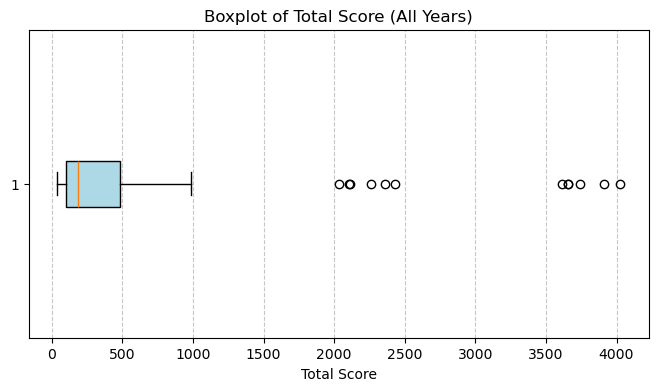

In [38]:
# Boxplot for total_score to visualize outliers
plt.figure(figsize=(8, 4))
plt.boxplot(total_score_df["total_score"], vert=False, patch_artist=True, 
            boxprops=dict(facecolor="lightblue"))

plt.title("Boxplot of Total Score (All Years)")
plt.xlabel("Total Score")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.savefig("plots/qs_total_score_trends.png", dpi=300, bbox_inches='tight')
plt.show()

In [39]:
# Make num_univ_df in which num_universities = count of unique universities per country-year
num_univ_df = (
    df_clean.groupby(["year", "country"], as_index=False)
      .agg(num_universities=("university", "nunique"))
)

print(num_univ_df.head())

   year    country  num_universities
0  2017  Argentina                 1
1  2017  Australia                15
2  2017    Austria                 3
3  2017    Belgium                 6
4  2017     Brazil                 2


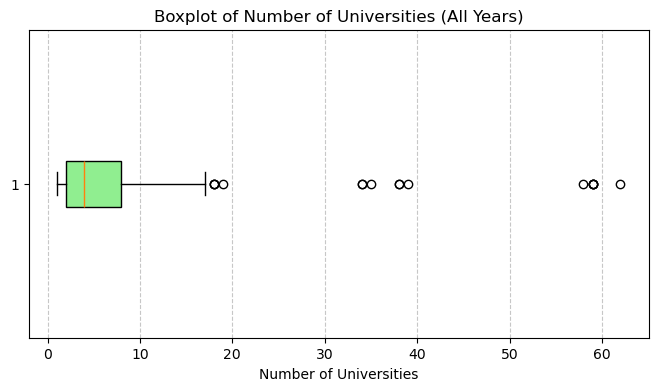

In [40]:
# Boxplot for num_universities
plt.figure(figsize=(8, 4))
plt.boxplot(num_univ_df["num_universities"], vert=False, patch_artist=True, 
            boxprops=dict(facecolor="lightgreen"))
plt.title("Boxplot of Number of Universities (All Years)")
plt.xlabel("Number of Universities")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.savefig("plots/num_universities_trends.png", dpi=300, bbox_inches='tight')
plt.show()

In [41]:
# Merge total_score_df and num_universities_df to new agg_df
agg_df = total_score_df.merge(num_univ_df, on=["year", "country"], how="left")

# Make avg_score_df in which avg_score = total_score / num_universities
agg_df["avg_score"] = agg_df["total_score"] / agg_df["num_universities"]

print(agg_df.head())

   year    country  total_score  num_universities  avg_score
0  2017  Argentina         65.8                 1  65.800000
1  2017  Australia        884.1                15  58.940000
2  2017    Austria        139.0                 3  46.333333
3  2017    Belgium        318.7                 6  53.116667
4  2017     Brazil        107.0                 2  53.500000


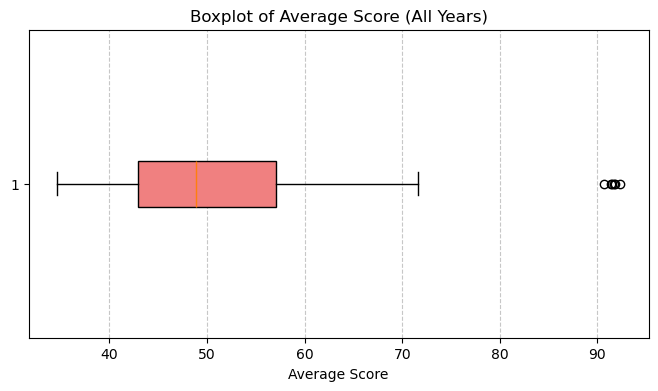

In [42]:
# Boxplot for avg_score
plt.figure(figsize=(8, 4))
plt.boxplot(agg_df["avg_score"], vert=False, patch_artist=True, 
            boxprops=dict(facecolor="lightcoral"))
plt.title("Boxplot of Average Score (All Years)")
plt.xlabel("Average Score")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.savefig("plots/avearge_scores_trends.png", dpi=300, bbox_inches='tight')
plt.show()

Our analysis of the boxplots for average score, number of universities, and total score indicate that there are no problematic outliers in the statistical sense; instead, the apparent “outlier” points correspond to countries that consistently outperform others.
In the average score plot, a few countries (e.g., with scores above 90) stand out for exceptional per-institution quality.
In the number of universities plot, the higher values simply reflect nations with large higher-education systems.
In the total score plot, the highest values belong to countries combining both many ranked universities and strong performance, positioning them as leaders rather than anomalies.

### Visualizations 

We use:
- **Bar plots** of Top 10 countries under each perspective.
- **Time‑series plots** of score trends for leading countries.

In [45]:
# ---------- Build aggregated dataset ----------
def build_agg_from_raw(df_clean: pd.DataFrame) -> pd.DataFrame:
    """
    Expects columns: ['university','year','score','country'].
    Returns agg_df with: ['year','country','total_score','num_universities','avg_score'].
    """
    required_cols = {"university", "year", "score", "country"}
    missing = required_cols - set(df_clean.columns)
    if missing:
        raise KeyError(f"Missing columns: {sorted(missing)}")

    # Drop rows with NaNs in essential columns
    df = df_clean.dropna(subset=["country", "year", "score", "university"]).copy()
    df["year"] = df["year"].astype(int)

    # One groupby-agg for both metrics
    agg_df = (
        df.groupby(["year", "country"], as_index=False)
          .agg(
              total_score=("score", "sum"),
              num_universities=("university", "nunique")
          )
    )

    # Average score per university
    agg_df["avg_score"] = agg_df["total_score"] / agg_df["num_universities"]

    return agg_df

agg_df.to_csv("tables/agg_university_metrics.csv", index=False)

# ---------- 2) Helper to get top-K per year ----------
def top_k_per_year(df_clean: pd.DataFrame, value_col: str, k: int = 10) -> pd.DataFrame:
    need = {"year", "country", value_col}
    if not need.issubset(df.columns):
        raise KeyError(f"DataFrame must contain: {sorted(need)}")
    return (
        df.sort_values(["year", value_col], ascending=[True, False], kind="mergesort")
          .groupby("year", group_keys=False)
          .head(k)
          .reset_index(drop=True)
    )

# ---------- 3) Plotters (one per metric) ----------
def plot_top10_total_score_per_year(agg_df: pd.DataFrame, k: int = 10):
    for y in sorted(agg_df["year"].unique()):
        d = (agg_df[agg_df["year"] == y]
             .sort_values("total_score", ascending=False)
             .head(k).iloc[::-1])
        plt.figure(figsize=(10, 6))
        plt.barh(d["country"], d["total_score"])
        for i, v in enumerate(d["total_score"]):
            plt.text(v, i, f"{v:.1f}", va="center", ha="left")
        plt.title(f"Top {k} Countries by Total Score ({y})")
        plt.xlabel("Total Score")
        plt.tight_layout()
        plt.show()


def plot_top10_avg_score_per_year(agg_df: pd.DataFrame, k: int = 10):
    for y in sorted(agg_df["year"].unique()):
        d = (agg_df[agg_df["year"] == y]
             .sort_values("avg_score", ascending=False)
             .head(k).iloc[::-1])
        plt.figure(figsize=(10, 6))
        plt.barh(d["country"], d["avg_score"])
        # label with both avg and number of universities
        for i, (v, n) in enumerate(zip(d["avg_score"], d["num_universities"])):
            plt.text(v, i, f"{v:.1f}  |  {n} univ", va="center", ha="left")
        plt.title(f"Top {k} Countries by Average Score ({y})")
        plt.xlabel("Average Score per University")
        plt.tight_layout()
        plt.show()


def plot_top10_num_universities_per_year(agg_df: pd.DataFrame, k: int = 10):
    for y in sorted(agg_df["year"].unique()):
        d = (agg_df[agg_df["year"] == y]
             .sort_values("num_universities", ascending=False)
             .head(k).iloc[::-1])
        plt.figure(figsize=(10, 6))
        plt.barh(d["country"], d["num_universities"])
        for i, v in enumerate(d["num_universities"]):
            plt.text(v, i, f"{v}", va="center", ha="left")
        plt.title(f"Top {k} Countries by Number of Universities ({y})")
        plt.xlabel("Number of Universities")
        plt.tight_layout()
        plt.show()


# ---------- 4) Example usage ----------
# raw df name assumed to be `df` with cols: university, year, score, country
# agg_df = build_agg_from_raw(df)

# Tables (if you need them):
# top10_total = top_k_per_year(agg_df[["year","country","total_score"]], "total_score", k=10)
# top10_avg   = top_k_per_year(agg_df[["year","country","avg_score","num_universities"]], 
        #"avg_score", k=10)
# top10_count = top_k_per_year(agg_df[["year","country","num_universities"]], 
        #"num_universities", k=10)

# Plots:
# plot_top10_total_score_per_year(agg_df, k=10)
# plot_top10_avg_score_per_year(agg_df, k=10)
# plot_top10_num_universities_per_year(agg_df, k=10)

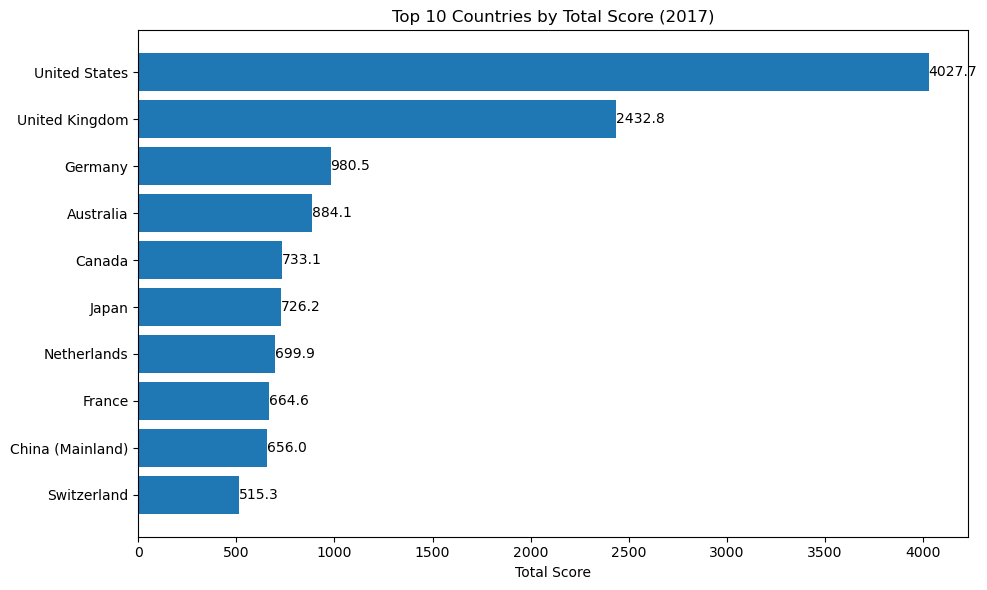

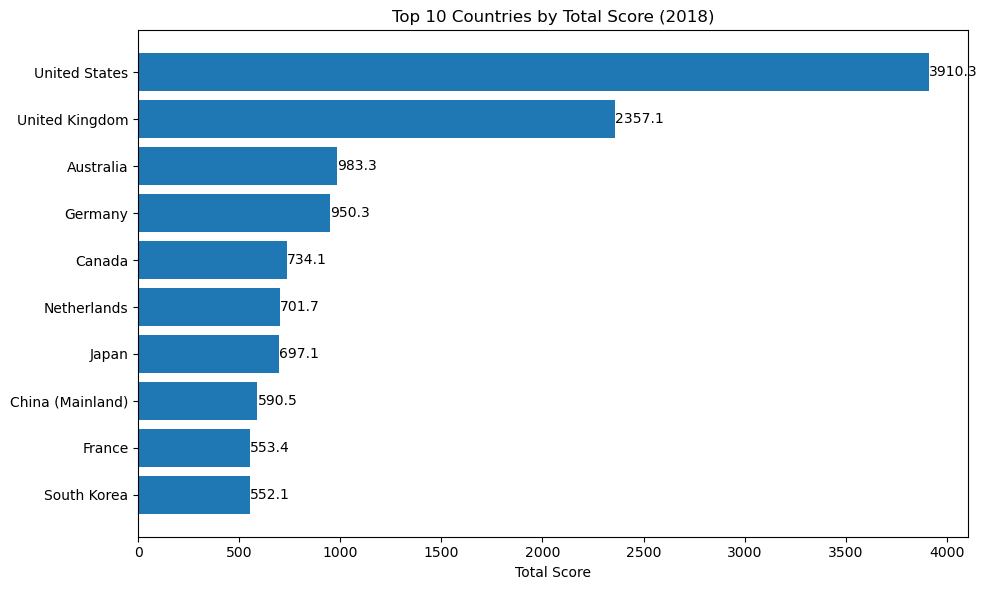

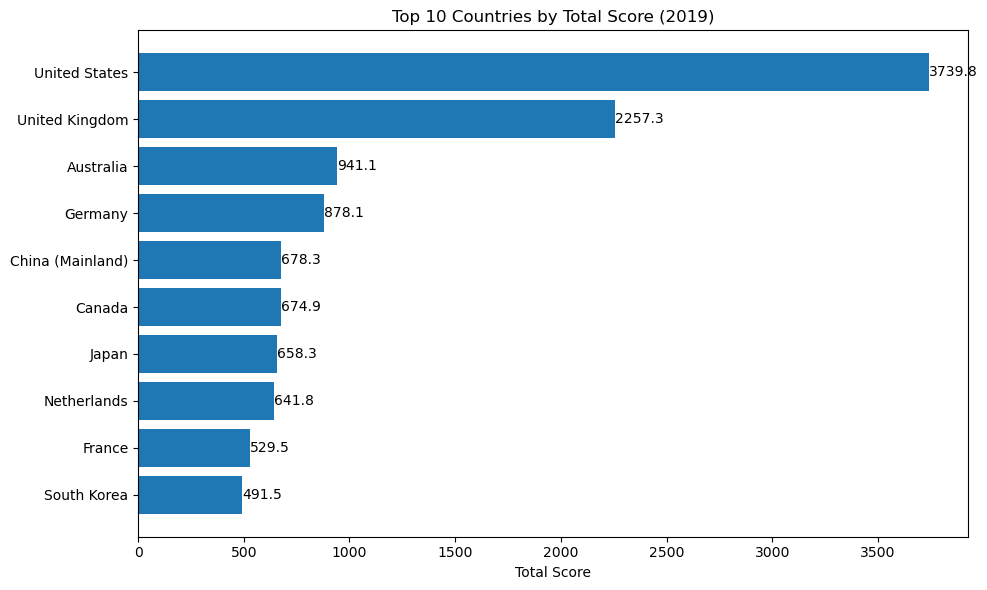

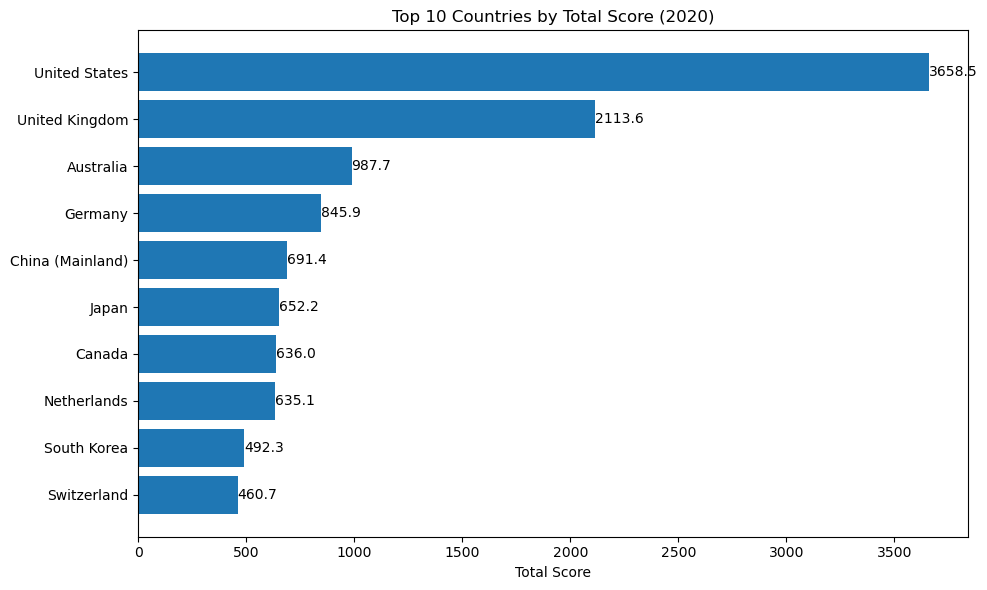

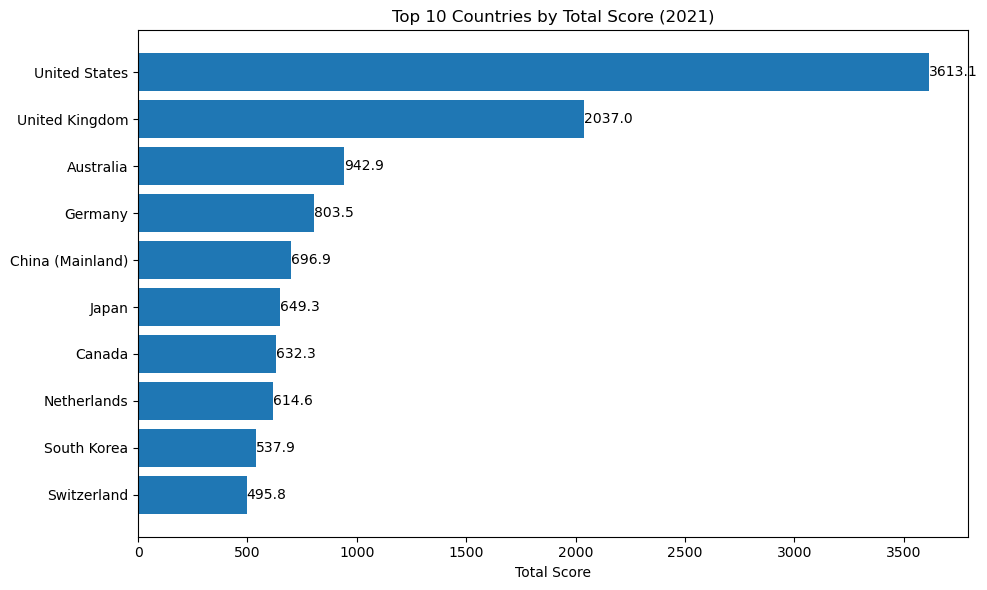

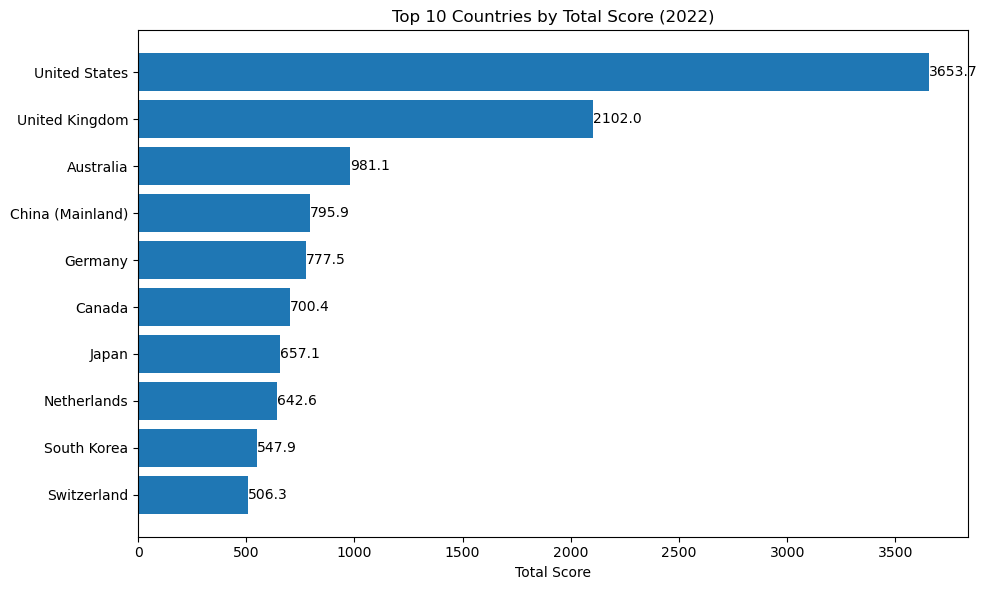

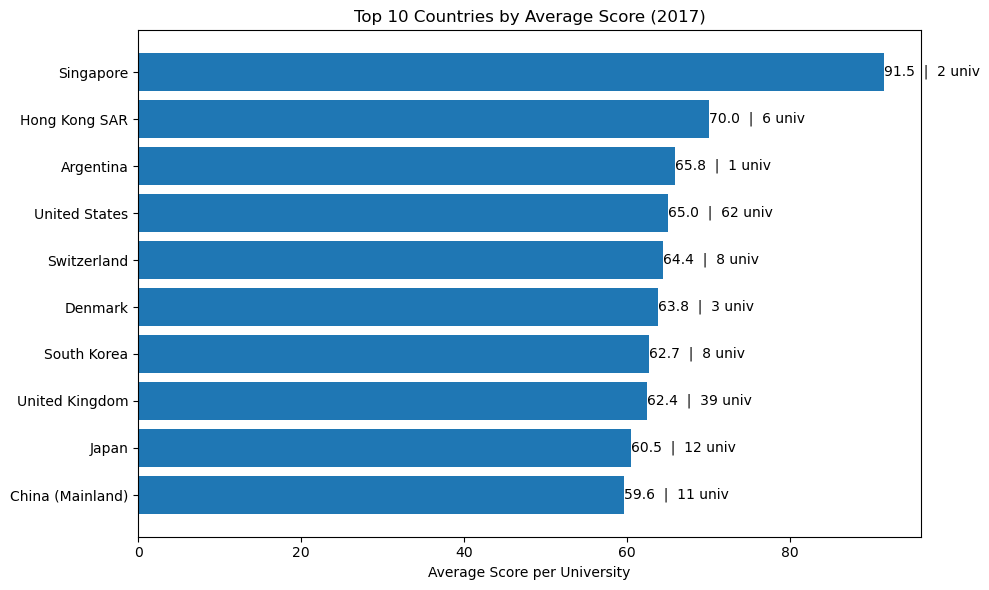

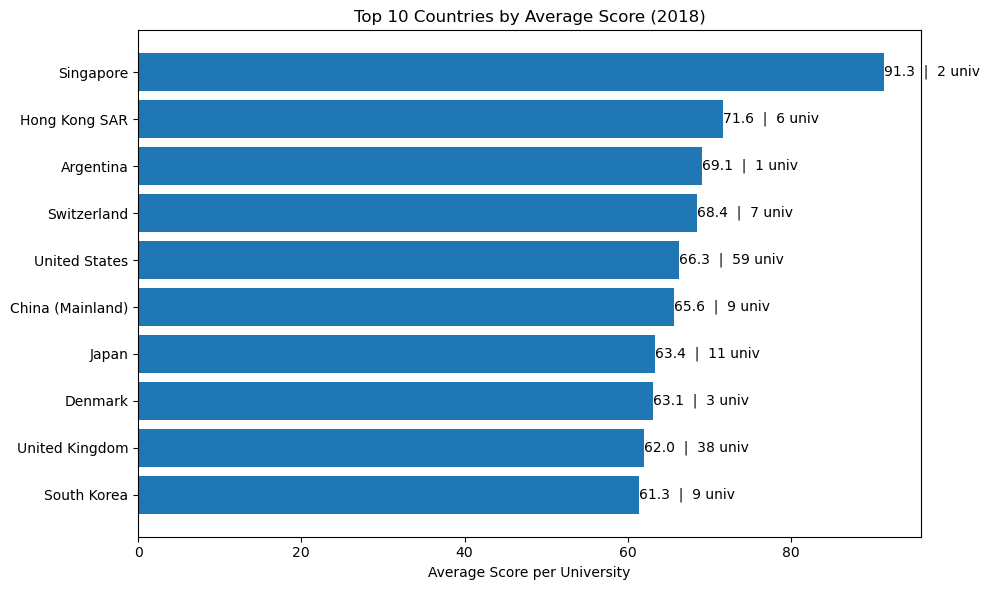

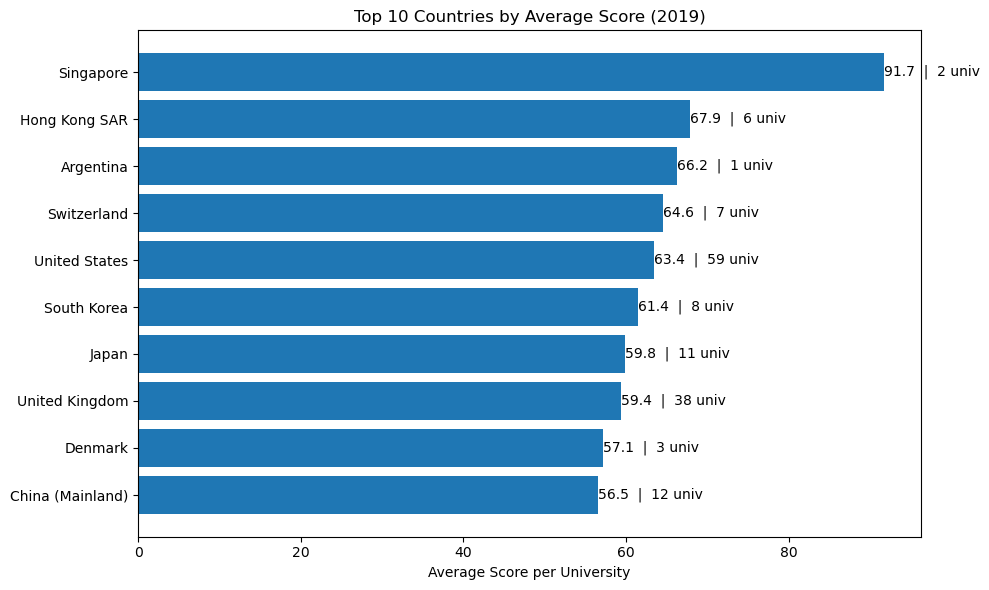

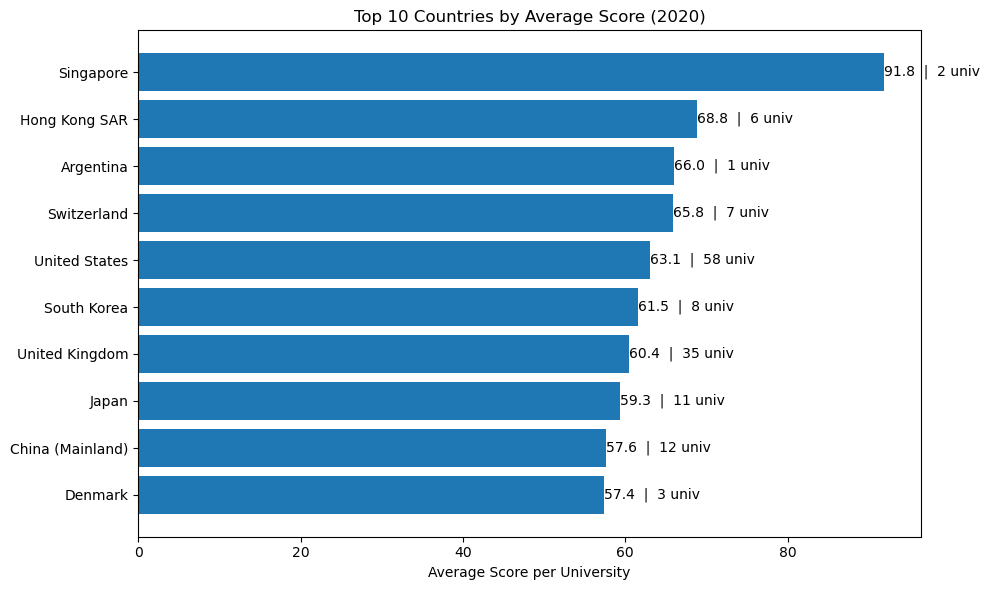

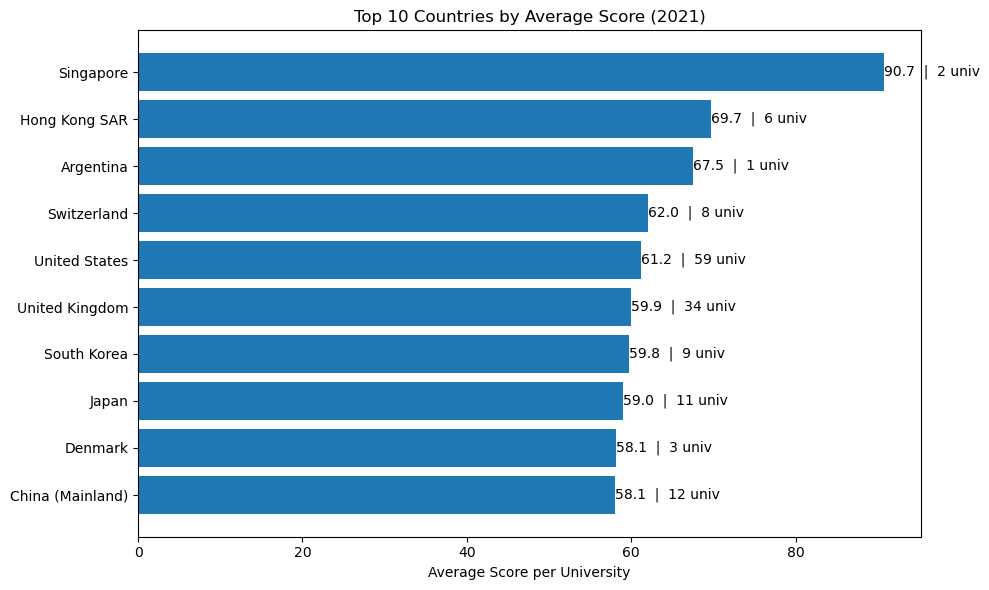

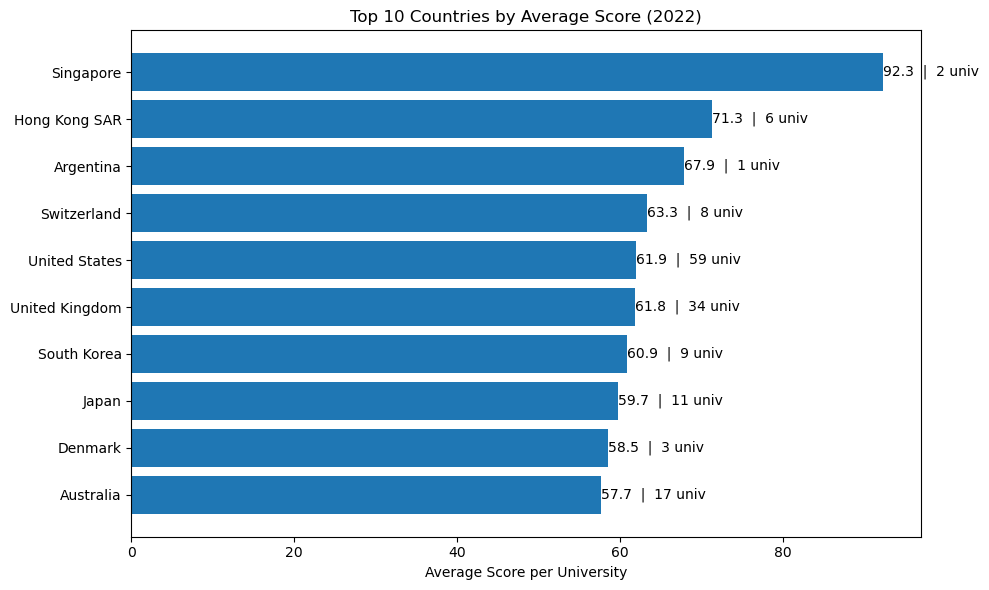

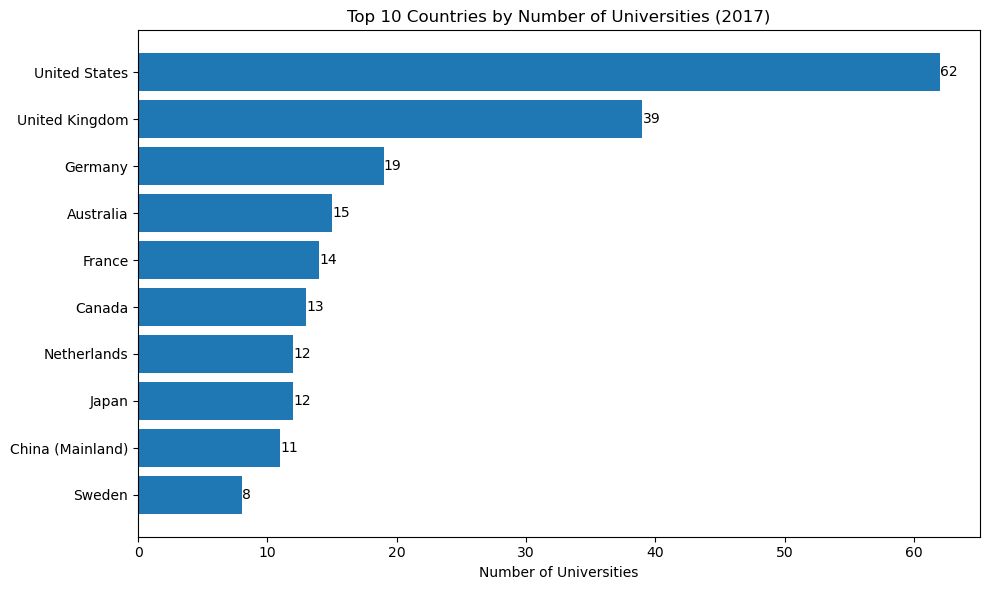

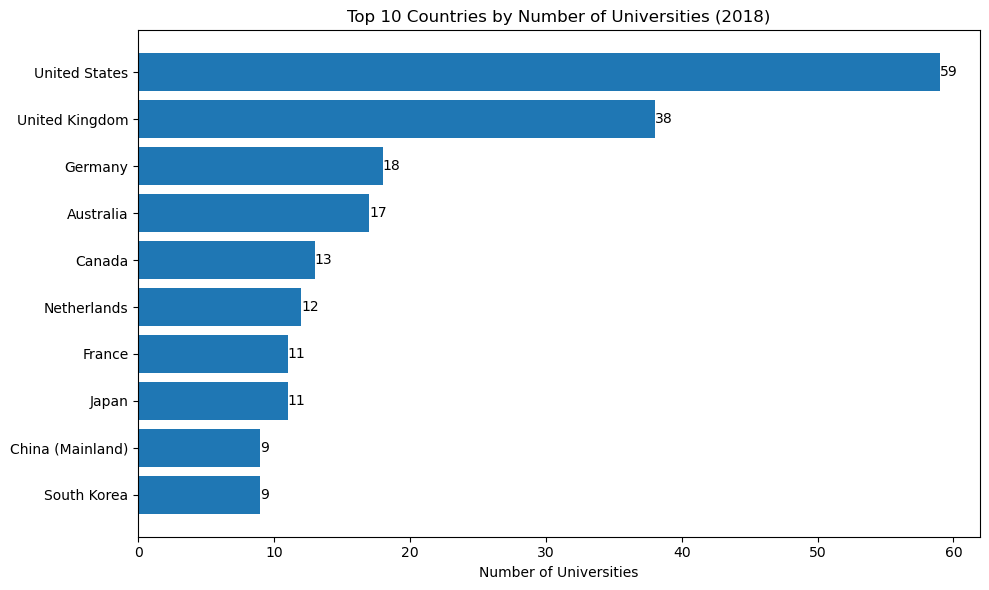

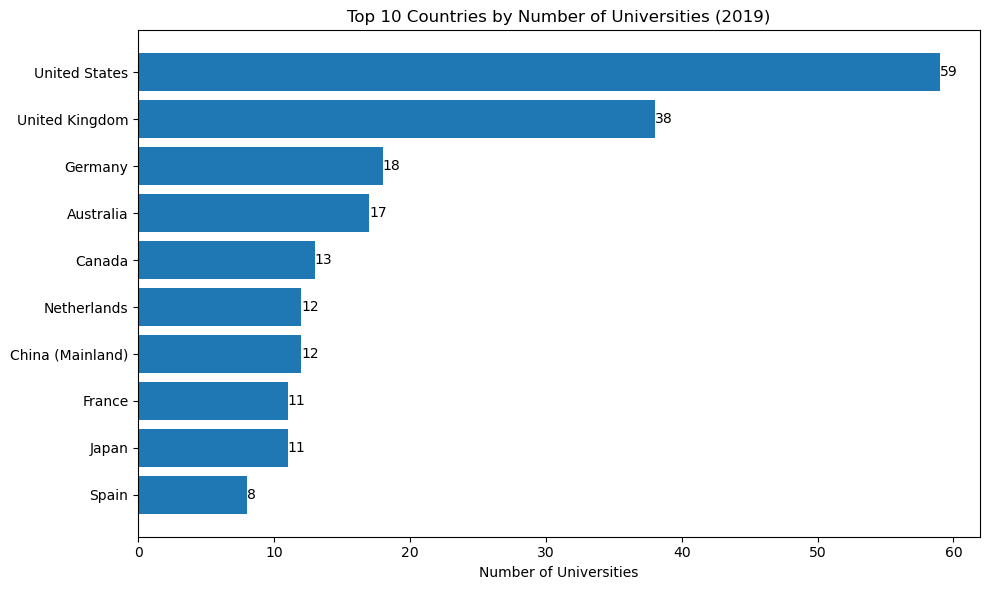

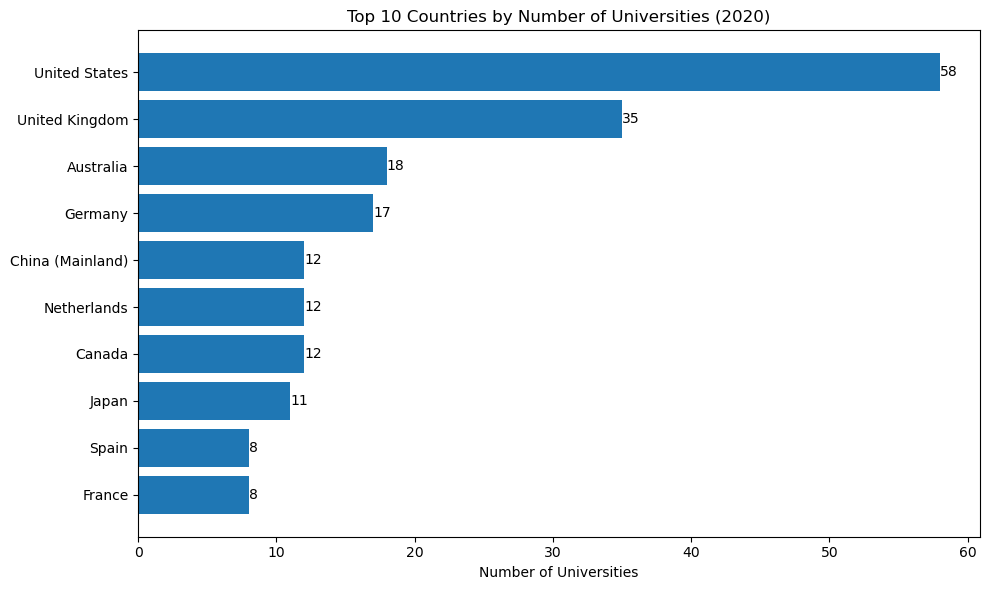

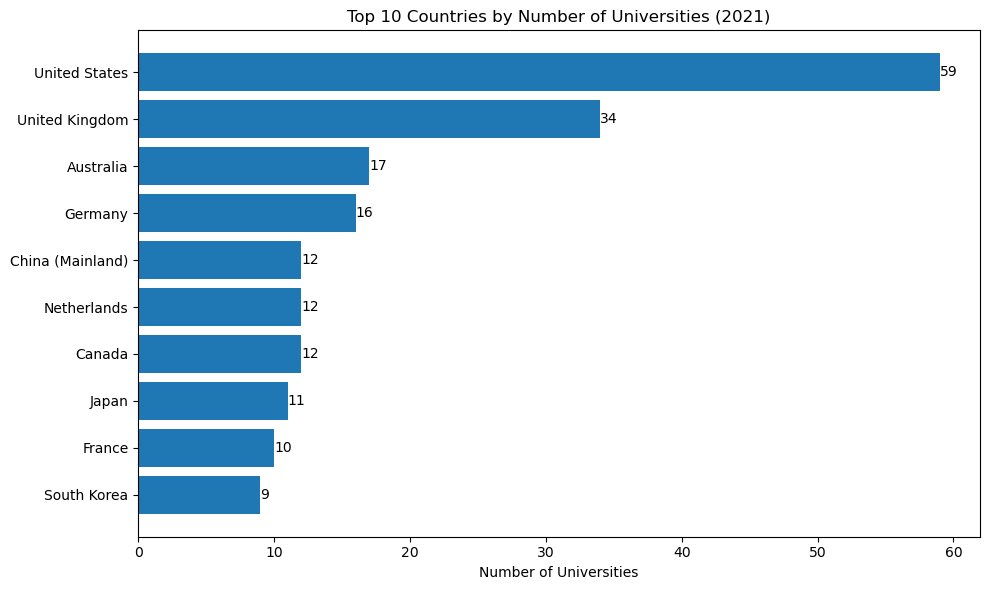

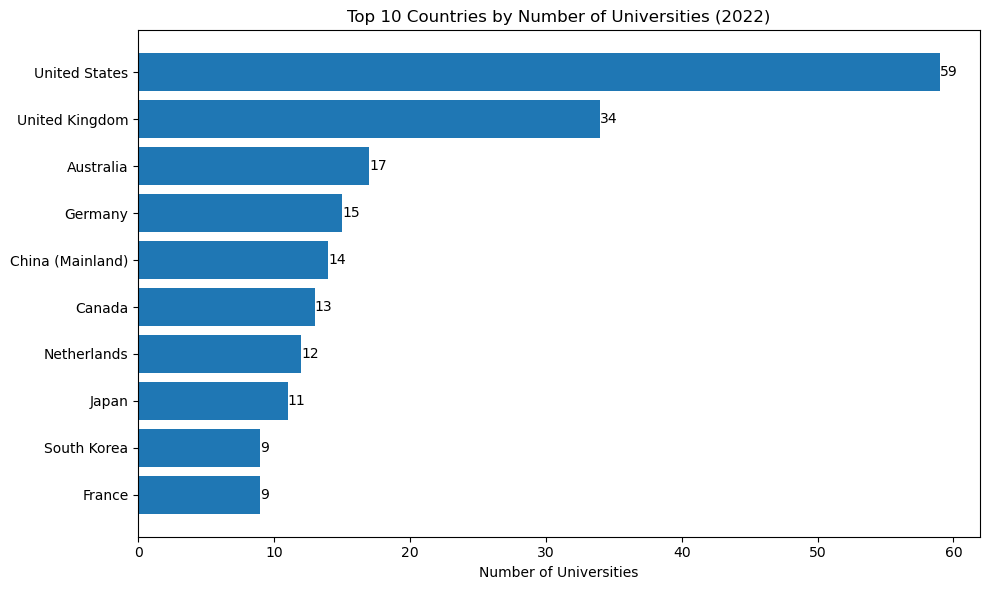

In [46]:
plot_top10_total_score_per_year(agg_df, k=10)
plot_top10_avg_score_per_year(agg_df, k=10)
plot_top10_num_universities_per_year(agg_df, k=10)

In [47]:
def plot_score_trends(agg_df: pd.DataFrame, metric: str = "total_score", top_n: int = 5):
    """
    Plots time-series trends for the top N countries based on the last available year.
    
    Parameters
    ----------
    agg_df : pd.DataFrame
        Must contain ['year','country', metric].
    metric : str
        One of ['total_score', 'avg_score', 'num_universities'].
    top_n : int
        Number of countries to plot (selected from the last year).
    """
    if metric not in agg_df.columns:
        raise KeyError(f"Metric '{metric}' not found in DataFrame.")

    # --- Determine top N countries based on last year ---
    last_year = agg_df["year"].max()
    top_countries = (
        agg_df[agg_df["year"] == last_year]
        .nlargest(top_n, metric)["country"]
        .tolist()
    )

    # --- Filter for those countries only ---
    plot_df = agg_df[agg_df["country"].isin(top_countries)].copy()

    # --- Plot ---
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=plot_df, x="year", y=metric, hue="country", marker="o")

    plt.title(f"{metric.replace('_', ' ').title()} Trends for Top {top_n} Countries")
    plt.xlabel("Year")
    plt.ylabel(metric.replace("_", " ").title())
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.tight_layout()
    plt.show()

# Example usage:
# plot_score_trends(agg_df, metric="total_score", top_n=5)

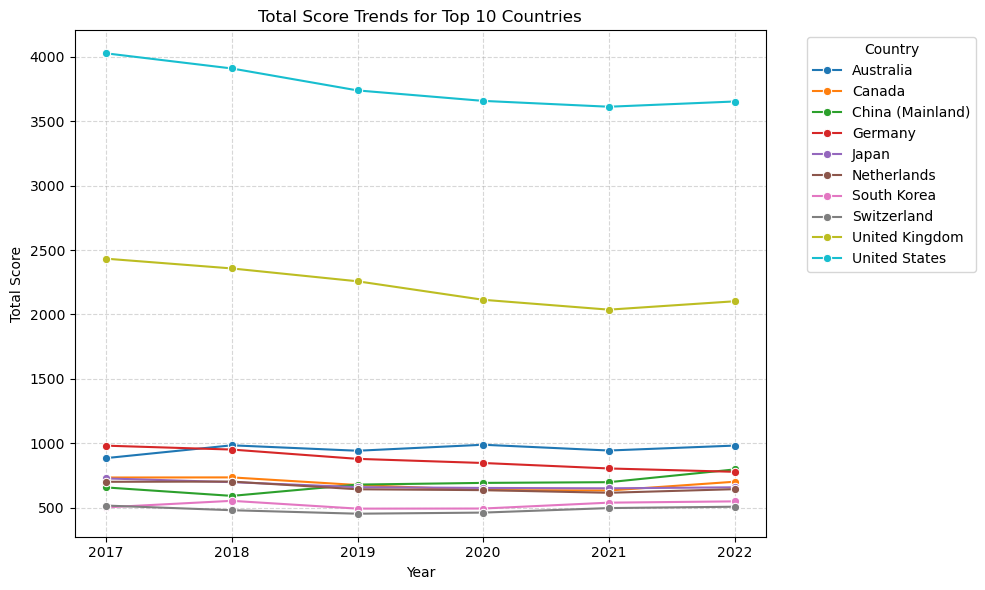

In [48]:
plot_score_trends(agg_df, metric="total_score", top_n=10)
# plot_score_trends(agg_df, metric="avg_score", top_n=5)

## Economic and Educational Indicators - EDA

### Data Overview
The economic and governance indicators used in this study gross domestic product (GDP) per capita, government expenditure on education (as a percentage of GDP), research and development (R&D) expenditure (as a percentage of GDP), and government effectiveness—are sourced from the World Bank’s World Development Indicators database. These datasets cover the period 2017–2022 and are reported at the country-year level, enabling direct comparison with the QS World University Rankings data.

The overview process includes:

Displaying metadata such as the total number of countries represented and the time span of the data for each indicator.

Presenting sample rows to inspect the data structure, units of measurement, and formatting consistency.

Examining column data types to ensure compatibility with merging operations and statistical analyses.

Assessing the completeness of each dataset by identifying missing values across countries and years.

Reviewing indicator units (e.g., constant USD, percentage of GDP, index scores) to confirm comparability and readiness for analysis.

Descriptive statistics (mean, median, standard deviation) are computed for each indicator to gain an initial understanding of their distribution and variation across countries and over time.

In [51]:
# Load datasets
gdp_df = pd.read_csv("data/gdp.csv")
edu_df = pd.read_csv("data/gov_exp_on_edu.csv")
gov_df = pd.read_csv("data/gov_effect_score .csv")
res_df = pd.read_csv("data/res_dev.csv")

In [52]:
gdp_df

,Series Name,Series Code,Country Name,Country Code,1990 [YR1990],2000 [YR2000],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023],2024 [YR2024]
0,GDP per capita (current US$),NY.GDP.PCAP.CD,Afghanistan,AFG,..,174.930991430166,565.569730408751,522.082215583898,525.469770891619,491.337221382603,496.6025042585,510.787063366811,356.496214115892,357.261152798144,413.757894705303,..
1,GDP per capita (current US$),NY.GDP.PCAP.CD,Albania,ALB,617.230435515505,1160.42047054038,3981.72662261867,4168.37544462548,4614.0479692596,5365.48880180298,5460.4305086932,5370.77749956875,6413.28280828537,6846.42669381643,8575.17134637222,10011.6279856667
2,GDP per capita (current US$),NY.GDP.PCAP.CD,Algeria,DZA,2445.18332740258,1772.92869122761,4685.05902729002,4424.98529027556,4554.66753957828,4577.21029180491,4468.45341883656,3743.5419522929,4160.55926736925,4961.55257664733,5364.02795022731,5631.17999109851
3,GDP per capita (current US$),NY.GDP.PCAP.CD,American Samoa,ASM,..,..,12727.4102651386,12843.3342903627,11863.6839452565,12552.0546868861,12886.1359517218,14489.2586563775,15236.1604875571,18017.4589383973,..,..
4,GDP per capita (current US$),NY.GDP.PCAP.CD,Andorra,AND,19563.6574722488,21810.2487431414,38654.9347203095,40129.8192007698,40672.9943348258,42819.7745797624,41257.8045846483,37361.0900666982,42425.6996756291,42414.0590092117,46812.4484486309,49303.6733899464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
269,Data from database: World Development Indicators,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
edu_df

,Series Name,Series Code,Country Name,Country Code,1990 [YR1990],2000 [YR2000],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023],2024 [YR2024]
0,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,Afghanistan,AFG,..,..,3.2558000087738,4.54397010803223,4.34319019317627,..,..,..,..,..,..,..
1,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,Albania,ALB,..,3.4301700592041,3.43796992301941,3.96209001541138,3.61172008514404,3.15294480323792,3.91623997688293,3.3422999382019,3.02255988121033,2.74432992935181,..,..
2,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,Algeria,DZA,..,..,6.17633008956909,6.50210857391357,5.73482370376587,5.81275129318237,5.57536554336548,6.1939172744751,5.51403284072876,4.74924659729004,5.61015701293945,..
3,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,American Samoa,ASM,..,..,..,..,..,..,..,..,..,..,..,..
4,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,Andorra,AND,..,..,3.28034996986389,3.23707008361816,3.21708989143372,3.2467200756073,3.15060997009277,2.63213038444519,2.58397221565247,2.64728999137878,1.92790997028351,..
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
269,Data from database: World Development Indicators,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
# Get basic information
gdp_df.info()
edu_df.info()
gov_df.info()
res_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271 entries, 0 to 270
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Series Name    268 non-null    object
 1   Series Code    266 non-null    object
 2   Country Name   266 non-null    object
 3   Country Code   266 non-null    object
 4   1990 [YR1990]  266 non-null    object
 5   2000 [YR2000]  266 non-null    object
 6   2015 [YR2015]  266 non-null    object
 7   2016 [YR2016]  266 non-null    object
 8   2017 [YR2017]  266 non-null    object
 9   2018 [YR2018]  266 non-null    object
 10  2019 [YR2019]  266 non-null    object
 11  2020 [YR2020]  266 non-null    object
 12  2021 [YR2021]  266 non-null    object
 13  2022 [YR2022]  266 non-null    object
 14  2023 [YR2023]  266 non-null    object
 15  2024 [YR2024]  266 non-null    object
dtypes: object(16)
memory usage: 34.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271 entries, 0 to 270
Data co

In [55]:
def clean_worldbank_df(df, country_col="Country Name", last_country="Zimbabwe"):
    """
    Cleans a World Bank dataset by:
    - Dropping fully empty rows
    - Keeping only rows from the start until the last country (e.g., Zimbabwe)
    - Resetting the index
    
    Parameters
    ----------
    df : pd.DataFrame
        The dataset to clean
    country_col : str
        Name of the column containing country names
    last_country : str
        The last valid country in the dataset (default: 'Zimbabwe')
    
    Returns
    -------
    pd.DataFrame
        Cleaned dataset
    """
    # Remove completely empty rows
    df = df.dropna(how="all")
    
    # Keep only up to last_country
    last_country_idx = df[df[country_col] == last_country].index
    if not last_country_idx.empty:
        df = df.loc[:last_country_idx[0]]
    
    # Reset index
    df = df.reset_index(drop=True)
    
    return df

# Apply to all datasets
gdp_df = clean_worldbank_df(gdp_df)
edu_df = clean_worldbank_df(edu_df)
gov_df = clean_worldbank_df(gov_df)
res_df = clean_worldbank_df(res_df)

# Quick check
print(gdp_df.tail())

                      Series Name     Series Code           Country Name  \
212  GDP per capita (current US$)  NY.GDP.PCAP.CD  Virgin Islands (U.S.)   
213  GDP per capita (current US$)  NY.GDP.PCAP.CD     West Bank and Gaza   
214  GDP per capita (current US$)  NY.GDP.PCAP.CD            Yemen, Rep.   
215  GDP per capita (current US$)  NY.GDP.PCAP.CD                 Zambia   
216  GDP per capita (current US$)  NY.GDP.PCAP.CD               Zimbabwe   

    Country Code     1990 [YR1990]     2000 [YR2000]     2015 [YR2015]  \
212          VIR                ..                ..  34007.3529411765   
213          PSE                ..  1476.17185000238  3272.15432360708   
214          YEM  910.422465960748  493.235182634814  1362.17381205593   
215          ZMB  422.336298804219  359.429500988221  1295.87788680068   
216          ZWE   866.48652703408  562.556945680495  1386.41855927575   

        2016 [YR2016]     2017 [YR2017]     2018 [YR2018]     2019 [YR2019]  \
212  35324.97488745

### Data Cleaning
The cleaning process ensures the World Bank datasets are accurate, harmonized, and ready for integration with the QS ranking data. Key steps include:

Filtering: Restricting each dataset to the years 2017–2022 to match the QS rankings timeframe.

Country name standardization: Harmonizing country names across all indicators to match the standardized naming in the QS dataset, ensuring smooth merging.

Missing values: Identifying gaps in the time series for individual countries. For indicators with sporadic missing years, interpolation or forward/backward filling is considered if the gap is minimal; otherwise, countries with substantial missing data are excluded from certain analyses.

Data type and unit consistency: Ensuring all numerical values are stored in the correct format (e.g., floats) and confirming uniform units of measurement across years and countries.

Outlier review: Generating boxplots for each indicator to detect extreme values. Potential anomalies are cross-checked with the original World Bank source to determine whether they reflect real-world events (e.g., economic shocks) or require correction.

Through this process, the four economic and governance datasets are transformed into a clean, consistent, and fully aligned format, enabling robust correlation, regression, and comparative analyses alongside the QS university ranking data.

Lagged GDP (t-1) vs score at time t

Scatter plots, heatmaps, and regression lines help here.

#### Handling Missing Values

In [59]:
def check_missing_values(df: pd.DataFrame, dataset_name: str = "Dataset",
                         year_min: int = 2017, year_max: int = 2022):
    """
    Cleans '..' placeholders to NaN, checks missing values ONLY for years in [year_min, year_max],
    and returns cleaned DataFrame + summary.
    """
    df_clean = (
        df.copy()
          .replace(r"^\s*\.\.\s*$", np.nan, regex=True)
          .infer_objects(copy=False)
    )

    # Detect year columns
    def _extract_year(col):
        m = re.match(r"^\s*((19|20)\d{2})", str(col))
        return int(m.group(1)) if m else None

    year_cols = [c for c in df_clean.columns
                 if (y := _extract_year(c)) is not None and year_min <= y <= year_max]

    if not year_cols:
        print(f"[{dataset_name}] No year columns found in {year_min}–{year_max} range.")
        return df_clean, pd.DataFrame()

    # Missing summary only for relevant years
    missing_summary = df_clean[year_cols].isna().sum().to_frame(name="missing_count")
    missing_summary["missing_pct"] = (missing_summary["missing_count"] / len(df_clean)) * 100

    print(f"=== Missing Values Summary ({year_min}–{year_max}): {dataset_name} ===")
    print(missing_summary)

    return df_clean, missing_summary

In [60]:
df_clean_gdp, missing_summary_gdp = check_missing_values(gdp_df)

=== Missing Values Summary (2017–2022): Dataset ===
               missing_count  missing_pct
2017 [YR2017]              7     3.225806
2018 [YR2018]              7     3.225806
2019 [YR2019]              6     2.764977
2020 [YR2020]              7     3.225806
2021 [YR2021]              7     3.225806
2022 [YR2022]              8     3.686636


In [61]:
df_clean_edu, missing_summary_edu = check_missing_values(edu_df)

=== Missing Values Summary (2017–2022): Dataset ===
               missing_count  missing_pct
2017 [YR2017]             46    21.198157
2018 [YR2018]             51    23.502304
2019 [YR2019]             50    23.041475
2020 [YR2020]             52    23.963134
2021 [YR2021]             52    23.963134
2022 [YR2022]             80    36.866359


In [62]:
df_clean_gov, missing_summary_gov = check_missing_values(gov_df)

=== Missing Values Summary (2017–2022): Dataset ===
               missing_count  missing_pct
2017 [YR2017]             12     5.529954
2018 [YR2018]             12     5.529954
2019 [YR2019]             12     5.529954
2020 [YR2020]             12     5.529954
2021 [YR2021]             12     5.529954
2022 [YR2022]             12     5.529954


In [63]:
df_clean_res, missing_summary_res = check_missing_values(res_df)

=== Missing Values Summary (2017–2022): Dataset ===
               missing_count  missing_pct
2017 [YR2017]            122    56.221198
2018 [YR2018]            124    57.142857
2019 [YR2019]            122    56.221198
2020 [YR2020]            131    60.368664
2021 [YR2021]            133    61.290323
2022 [YR2022]            141    64.976959


In [64]:
def _yr_cols_2017_2022(df):
    yrs = []
    for c in df.columns:
        m = re.search(r'(19|20)\d{2}', str(c))
        if m:
            y = int(m.group(0))
            if 2017 <= y <= 2022:
                yrs.append((c, y))
    # sort chronologically by the year found in the name
    yrs.sort(key=lambda t: t[1])
    return [c for c, _ in yrs]

def clean_interp_2017_2022(df: pd.DataFrame):
    """
    - Finds columns whose names contain a year in [2017..2022]
    - Replaces '..' with NaN, coerces to numeric
    - Row-wise linear interpolation across 2017..2022
    - Returns (clean_df, report_df)
    """
    year_cols = _yr_cols_2017_2022(df)
    if not year_cols:
        raise ValueError("No 2017–2022 year-like columns found.")

    out = df.copy()

    # Clean and coerce
    out[year_cols] = out[year_cols].replace(r'^\s*\.\.\s*$', np.nan, regex=True)
    out[year_cols] = out[year_cols].apply(pd.to_numeric, errors="coerce")

    # Missing report (before)
    before = out[year_cols].isna().sum()
    total_before = int(before.sum())
    rows_all_na_before = int(out[year_cols].isna().all(axis=1).sum())

    # Interpolate left↔right across years
    out[year_cols] = out[year_cols].interpolate(axis=1, limit_direction="both")

    # Missing report (after)
    after = out[year_cols].isna().sum()
    total_after = int(after.sum())
    rows_all_na_after = int(out[year_cols].isna().all(axis=1).sum())

    report = (
        pd.DataFrame({"missing_before": before, "missing_after": after})
          .assign(reduced=lambda d: d.missing_before - d.missing_after)
    )

    # Quick summary
    print("=== Year columns (2017–2022) ===")
    print(year_cols)
    print("\n=== Missing by column (before → after, reduced) ===")
    display(report)
    print("\n=== Overall ===")
    print(f"Total NaNs BEFORE: {total_before:,}")
    print(f"Total NaNs AFTER : {total_after:,}")
    print(f"Total Reduction  : {total_before - total_after:,}")
    print(f"Rows all-NaN across year cols BEFORE: {rows_all_na_before:,}")
    print(f"Rows all-NaN across year cols AFTER : {rows_all_na_after:,}")

    return out, report

# --- Example usage on any dataset shaped like World Bank data ---
# df_gdp_clean, gdp_report = clean_interp_2017_2022(df_gdp)
# df_edu_clean, edu_report = clean_interp_2017_2022(df_edu)
# df_rnd_clean, rnd_report = clean_interp_2017_2022(df_rnd)

In [65]:
df_gdp_clean, gdp_report = clean_interp_2017_2022(gdp_df)

=== Year columns (2017–2022) ===
['2017 [YR2017]', '2018 [YR2018]', '2019 [YR2019]', '2020 [YR2020]', '2021 [YR2021]', '2022 [YR2022]']

=== Missing by column (before → after, reduced) ===


,missing_before,missing_after,reduced
2017 [YR2017],7,6,1
2018 [YR2018],7,6,1
2019 [YR2019],6,6,0
2020 [YR2020],7,6,1
2021 [YR2021],7,6,1
2022 [YR2022],8,6,2



=== Overall ===
Total NaNs BEFORE: 42
Total NaNs AFTER : 36
Total Reduction  : 6
Rows all-NaN across year cols BEFORE: 6
Rows all-NaN across year cols AFTER : 6


In [66]:
df_edu_clean, edu_report = clean_interp_2017_2022(edu_df)
df_edu_clean.to_csv("tables/df_edu_clean.csv")

=== Year columns (2017–2022) ===
['2017 [YR2017]', '2018 [YR2018]', '2019 [YR2019]', '2020 [YR2020]', '2021 [YR2021]', '2022 [YR2022]']

=== Missing by column (before → after, reduced) ===


,missing_before,missing_after,reduced
2017 [YR2017],46,35,11
2018 [YR2018],51,35,16
2019 [YR2019],50,35,15
2020 [YR2020],52,35,17
2021 [YR2021],52,35,17
2022 [YR2022],80,35,45



=== Overall ===
Total NaNs BEFORE: 331
Total NaNs AFTER : 210
Total Reduction  : 121
Rows all-NaN across year cols BEFORE: 35
Rows all-NaN across year cols AFTER : 35


In [67]:
df_gov_clean, gov_report = clean_interp_2017_2022(gov_df)
df_gov_clean.to_csv("tables/df_gov_clean.csv")

=== Year columns (2017–2022) ===
['2017 [YR2017]', '2018 [YR2018]', '2019 [YR2019]', '2020 [YR2020]', '2021 [YR2021]', '2022 [YR2022]']

=== Missing by column (before → after, reduced) ===


,missing_before,missing_after,reduced
2017 [YR2017],12,12,0
2018 [YR2018],12,12,0
2019 [YR2019],12,12,0
2020 [YR2020],12,12,0
2021 [YR2021],12,12,0
2022 [YR2022],12,12,0



=== Overall ===
Total NaNs BEFORE: 72
Total NaNs AFTER : 72
Total Reduction  : 0
Rows all-NaN across year cols BEFORE: 12
Rows all-NaN across year cols AFTER : 12


In [68]:
df_res_clean, res_report = clean_interp_2017_2022(res_df)
df_res_clean.to_csv("tables/df_res_clean.csv")

=== Year columns (2017–2022) ===
['2017 [YR2017]', '2018 [YR2018]', '2019 [YR2019]', '2020 [YR2020]', '2021 [YR2021]', '2022 [YR2022]']

=== Missing by column (before → after, reduced) ===


,missing_before,missing_after,reduced
2017 [YR2017],122,105,17
2018 [YR2018],124,105,19
2019 [YR2019],122,105,17
2020 [YR2020],131,105,26
2021 [YR2021],133,105,28
2022 [YR2022],141,105,36



=== Overall ===
Total NaNs BEFORE: 773
Total NaNs AFTER : 630
Total Reduction  : 143
Rows all-NaN across year cols BEFORE: 105
Rows all-NaN across year cols AFTER : 105


In [69]:
# Show rows that still have at least one NaN in the year columns
year_cols = ['2017 [YR2017]', '2018 [YR2018]', '2019 [YR2019]',
             '2020 [YR2020]', '2021 [YR2021]', '2022 [YR2022]']

missing_rows = df_clean_res[df_clean_res[year_cols].isna().any(axis=1)]

print(missing_rows)
print(f"Number of rows with missing values after interpolation: {len(missing_rows)}")

                                         Series Name        Series Code  \
0    Research and development expenditure (% of GDP)  GB.XPD.RSDV.GD.ZS   
1    Research and development expenditure (% of GDP)  GB.XPD.RSDV.GD.ZS   
2    Research and development expenditure (% of GDP)  GB.XPD.RSDV.GD.ZS   
3    Research and development expenditure (% of GDP)  GB.XPD.RSDV.GD.ZS   
4    Research and development expenditure (% of GDP)  GB.XPD.RSDV.GD.ZS   
..                                               ...                ...   
212  Research and development expenditure (% of GDP)  GB.XPD.RSDV.GD.ZS   
213  Research and development expenditure (% of GDP)  GB.XPD.RSDV.GD.ZS   
214  Research and development expenditure (% of GDP)  GB.XPD.RSDV.GD.ZS   
215  Research and development expenditure (% of GDP)  GB.XPD.RSDV.GD.ZS   
216  Research and development expenditure (% of GDP)  GB.XPD.RSDV.GD.ZS   

              Country Name Country Code  1990 [YR1990] 2000 [YR2000]  \
0              Afghanistan 

In [70]:
missing_countries = df_clean_res.loc[df_clean_res[year_cols].isna().any(axis=1), 'Country Name'].unique()
print(missing_countries)

['Afghanistan' 'Albania' 'Algeria' 'American Samoa' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Aruba' 'Australia' 'Bahamas, The' 'Bahrain'
 'Bangladesh' 'Barbados' 'Belize' 'Benin' 'Bermuda' 'Bhutan' 'Bolivia'
 'Botswana' 'Brazil' 'British Virgin Islands' 'Brunei Darussalam'
 'Burkina Faso' 'Burundi' 'Cabo Verde' 'Cambodia' 'Cameroon'
 'Cayman Islands' 'Central African Republic' 'Chad' 'Channel Islands'
 'Chile' 'Colombia' 'Comoros' 'Congo, Dem. Rep.' 'Congo, Rep.'
 'Costa Rica' "Cote d'Ivoire" 'Curacao' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Equatorial Guinea' 'Eritrea' 'Eswatini'
 'Ethiopia' 'Faroe Islands' 'Fiji' 'French Polynesia' 'Gabon'
 'Gambia, The' 'Ghana' 'Gibraltar' 'Greenland' 'Grenada' 'Guam'
 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti' 'Honduras' 'India'
 'Indonesia' 'Iran, Islamic Rep.' 'Iraq' 'Isle of Man' 'Jamaica' 'Jordan'
 'Kenya' 'Kiribati' "Korea, Dem. People's Rep." 'Kosovo' 'Kuwait'
 'Lao PDR' 'Lebanon' 'Lesotho' 'Liberia' 'Libya' 'Liech

In [71]:
missing_countries = df_clean_res.loc[
    df_clean_res[year_cols].isna().any(axis=1),
    'Country Name'
].unique()

# Print list
print(missing_countries)

# Print total count
print(f"\nTotal missing countries: {len(missing_countries)}")

['Afghanistan' 'Albania' 'Algeria' 'American Samoa' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Aruba' 'Australia' 'Bahamas, The' 'Bahrain'
 'Bangladesh' 'Barbados' 'Belize' 'Benin' 'Bermuda' 'Bhutan' 'Bolivia'
 'Botswana' 'Brazil' 'British Virgin Islands' 'Brunei Darussalam'
 'Burkina Faso' 'Burundi' 'Cabo Verde' 'Cambodia' 'Cameroon'
 'Cayman Islands' 'Central African Republic' 'Chad' 'Channel Islands'
 'Chile' 'Colombia' 'Comoros' 'Congo, Dem. Rep.' 'Congo, Rep.'
 'Costa Rica' "Cote d'Ivoire" 'Curacao' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Equatorial Guinea' 'Eritrea' 'Eswatini'
 'Ethiopia' 'Faroe Islands' 'Fiji' 'French Polynesia' 'Gabon'
 'Gambia, The' 'Ghana' 'Gibraltar' 'Greenland' 'Grenada' 'Guam'
 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti' 'Honduras' 'India'
 'Indonesia' 'Iran, Islamic Rep.' 'Iraq' 'Isle of Man' 'Jamaica' 'Jordan'
 'Kenya' 'Kiribati' "Korea, Dem. People's Rep." 'Kosovo' 'Kuwait'
 'Lao PDR' 'Lebanon' 'Lesotho' 'Liberia' 'Libya' 'Liech

In [72]:
# Rows where ANY of the year columns is NaN
mask_missing = df_clean_res[year_cols].isna().any(axis=1)

# Unique countries with missing data
missing_countries = df_clean_res.loc[mask_missing, 'Country Name'].unique()

# Total number of rows with missing data
total_missing_rows = mask_missing.sum()

# Print results
print(missing_countries)
print(f"\nTotal missing countries: {len(missing_countries)}")
print(f"Total rows with missing data: {total_missing_rows}")

['Afghanistan' 'Albania' 'Algeria' 'American Samoa' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Aruba' 'Australia' 'Bahamas, The' 'Bahrain'
 'Bangladesh' 'Barbados' 'Belize' 'Benin' 'Bermuda' 'Bhutan' 'Bolivia'
 'Botswana' 'Brazil' 'British Virgin Islands' 'Brunei Darussalam'
 'Burkina Faso' 'Burundi' 'Cabo Verde' 'Cambodia' 'Cameroon'
 'Cayman Islands' 'Central African Republic' 'Chad' 'Channel Islands'
 'Chile' 'Colombia' 'Comoros' 'Congo, Dem. Rep.' 'Congo, Rep.'
 'Costa Rica' "Cote d'Ivoire" 'Curacao' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Equatorial Guinea' 'Eritrea' 'Eswatini'
 'Ethiopia' 'Faroe Islands' 'Fiji' 'French Polynesia' 'Gabon'
 'Gambia, The' 'Ghana' 'Gibraltar' 'Greenland' 'Grenada' 'Guam'
 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti' 'Honduras' 'India'
 'Indonesia' 'Iran, Islamic Rep.' 'Iraq' 'Isle of Man' 'Jamaica' 'Jordan'
 'Kenya' 'Kiribati' "Korea, Dem. People's Rep." 'Kosovo' 'Kuwait'
 'Lao PDR' 'Lebanon' 'Lesotho' 'Liberia' 'Libya' 'Liech

In [73]:
# Melt to long format for easier inspection
missing_long = df_clean_res.melt(
    id_vars=['Country Name'],
    value_vars=year_cols,
    var_name='Year',
    value_name='Value'
)

# Keep only missing values
missing_long = missing_long[missing_long['Value'].isna()]
print(missing_long.sort_values(['Country Name', 'Year']))

     Country Name           Year Value
0     Afghanistan  2017 [YR2017]   NaN
217   Afghanistan  2018 [YR2018]   NaN
434   Afghanistan  2019 [YR2019]   NaN
651   Afghanistan  2020 [YR2020]   NaN
868   Afghanistan  2021 [YR2021]   NaN
...           ...            ...   ...
433      Zimbabwe  2018 [YR2018]   NaN
650      Zimbabwe  2019 [YR2019]   NaN
867      Zimbabwe  2020 [YR2020]   NaN
1084     Zimbabwe  2021 [YR2021]   NaN
1301     Zimbabwe  2022 [YR2022]   NaN

[773 rows x 3 columns]


In [74]:
# Mask: countries with all year columns NaN
mask_all_missing = df_clean_res[year_cols].isna().all(axis=1)

# Get list of countries
countries_all_missing = df_clean_res.loc[mask_all_missing, 'Country Name'].unique()

# Total number of such countries
total_countries_all_missing = len(countries_all_missing)

# Total number of rows for them
total_rows_all_missing = df_clean_res.loc[mask_all_missing].shape[0]

# Print results
print("Countries with ALL NaN values in year columns:")
print(countries_all_missing)
print(f"\nTotal countries with all NaN: {total_countries_all_missing}")
print(f"Total rows with all NaN: {total_rows_all_missing}")

Countries with ALL NaN values in year columns:
['Afghanistan' 'Albania' 'American Samoa' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Aruba' 'Bahamas, The' 'Bahrain' 'Bangladesh'
 'Barbados' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Botswana'
 'British Virgin Islands' 'Cabo Verde' 'Cambodia' 'Cameroon'
 'Cayman Islands' 'Central African Republic' 'Chad' 'Channel Islands'
 'Comoros' 'Congo, Dem. Rep.' "Cote d'Ivoire" 'Curacao' 'Djibouti'
 'Dominica' 'Dominican Republic' 'Ecuador' 'Equatorial Guinea' 'Eritrea'
 'Eswatini' 'Faroe Islands' 'Fiji' 'French Polynesia' 'Gabon' 'Ghana'
 'Gibraltar' 'Greenland' 'Grenada' 'Guam' 'Guinea' 'Guinea-Bissau'
 'Guyana' 'Haiti' 'Isle of Man' 'Jamaica' 'Jordan' 'Kiribati'
 "Korea, Dem. People's Rep." 'Kosovo' 'Lao PDR' 'Lebanon' 'Lesotho'
 'Liberia' 'Libya' 'Malawi' 'Maldives' 'Marshall Islands'
 'Micronesia, Fed. Sts.' 'Monaco' 'Morocco' 'Mozambique' 'Nauru' 'Nepal'
 'New Caledonia' 'Nicaragua' 'Niger' 'Northern Mariana Islands' 'Palau'
 'Papua New Guinea' 'Pu

In [75]:
import os

# Ensure your year columns are defined
year_cols = ['2017 [YR2017]', '2018 [YR2018]', '2019 [YR2019]',
             '2020 [YR2020]', '2021 [YR2021]', '2022 [YR2022]']

# Melt to long format for easier inspection
missing_long = df_clean_res.melt(
    id_vars=['Country Name'],
    value_vars=year_cols,
    var_name='Year',
    value_name='Value'
)

# Keep only missing values
missing_long = missing_long[missing_long['Value'].isna()].copy()

# Optional: tidy 'Year' into a cleaner label (e.g., 2017 instead of '2017 [YR2017]')
# If you want to keep the original, skip this block.
import re
missing_long['Year_clean'] = missing_long['Year'].apply(
    lambda s: int(re.match(r'^\s*(\d{4})', str(s)).group(1)) if re.match(r'^\s*(\d{4})', str(s)) else s
)

# Sort for readability
missing_long = missing_long.sort_values(['Country Name', 'Year_clean'])

# Save to CSV (ensure directory exists)
out_dir = "tables"
os.makedirs(out_dir, exist_ok=True)
out_path = os.path.join(out_dir, "rd_missing_values_2017_2022.csv")
missing_long.to_csv(out_path, index=False)

# Display
print(missing_long[['Country Name', 'Year', 'Year_clean']])
print(f"\nSaved missing-value table to: {out_path}")

     Country Name           Year  Year_clean
0     Afghanistan  2017 [YR2017]        2017
217   Afghanistan  2018 [YR2018]        2018
434   Afghanistan  2019 [YR2019]        2019
651   Afghanistan  2020 [YR2020]        2020
868   Afghanistan  2021 [YR2021]        2021
...           ...            ...         ...
433      Zimbabwe  2018 [YR2018]        2018
650      Zimbabwe  2019 [YR2019]        2019
867      Zimbabwe  2020 [YR2020]        2020
1084     Zimbabwe  2021 [YR2021]        2021
1301     Zimbabwe  2022 [YR2022]        2022

[773 rows x 3 columns]

Saved missing-value table to: tables\rd_missing_values_2017_2022.csv


#### Data Tidying and Cleaning - Python Code

In [121]:
def wb_to_long_simple(
    df: pd.DataFrame,
    *,
    value_name: str,                 # e.g. "gov_effectiveness_pctile"
    series_code: str | None = None,  # e.g. "GE.PER.RNK" (recommended)
    series_name: str | None = None,  # e.g. "Government Effectiveness: Percentile Rank"
    year_min: int = 2017,
    year_max: int = 2022,
    interpolate: bool = True
) -> pd.DataFrame:
   
    """Minimal WB wide->long for 2017–2022 with optional series filter."""
    
    # Pick likely column names (kept very simple)
    name_col = ("Series Name" if "Series Name" in df.columns else
            "Indicator Name" if "Indicator Name" in df.columns else None)

    code_col = ("Series Code" if "Series Code" in df.columns else
            "Indicator Code" if "Indicator Code" in df.columns else None)

    country_col = ("Country Name" if "Country Name" in df.columns else
               "country" if "country" in df.columns else None)
    
    if country_col is None:
        raise KeyError("Need a country column (expected 'Country Name' or 'country').")

    d = df.copy()

    # Optional filter (exact match, case-insensitive)
    if series_code and code_col:
        d = d[d[code_col].astype(str).str.strip().str.casefold() == series_code.strip().casefold()]
    if series_name and name_col:
        d = d[d[name_col].astype(str).str.strip().str.casefold() == series_name.strip().casefold()]

    # Keep it simple: drop a few obvious meta cols + any Unnamed
    d = d.drop(columns=[c for c in ["Country Code", "Series Code", "Series Name", "Indicator Code", 
                                    "Indicator Name"] if c in d.columns], errors="ignore")
    d = d.loc[:, ~d.columns.str.match(r"^Unnamed")]

    # Year columns in window
    year_cols = []
    for c in d.columns:
        m = re.search(r"(19|20)\d{2}", str(c))
        if m:
            y = int(m.group(0))
            if year_min <= y <= year_max:
                year_cols.append((c, y))
    year_cols = [c for c, _ in sorted(year_cols, key=lambda t: t[1])]
    if not year_cols:
        raise ValueError(f"No year columns detected in {year_min}-{year_max}.")

    # Clean + numeric + (optional) interpolate across years
    d[year_cols] = d[year_cols].replace(r"^\s*\.\.\s*$", np.nan, regex=True).apply(pd.to_numeric, 
                                                                                   errors="coerce")
    if interpolate:
        d[year_cols] = d[year_cols].interpolate(axis=1, limit_direction="both")

    # Wide -> long
    long_df = d.melt(id_vars=[country_col], value_vars=year_cols, var_name="year_raw", 
                     value_name=value_name)
    long_df["year"] = pd.to_numeric(long_df["year_raw"].str.extract(r"(\d{4})")[0],
                                    errors="coerce").astype("Int64")
    long_df = long_df.drop(columns=["year_raw"]).dropna(subset=["year"])
    long_df["year"] = long_df["year"].astype(int)
    long_df = long_df[long_df["year"].between(year_min, year_max)]

    # Standardize country name + drop remaining NaNs
    if country_col != "country":
        long_df = long_df.rename(columns={country_col: "country"})
    return long_df.dropna(subset=[value_name]).reset_index(drop=True)

In [123]:
gov_pct_long = wb_to_long_simple(
    df_gov_clean,
    value_name="gov_effectiveness",
    series_code="GE.PER.RNK"  
)
print(gov_pct_long.head())

          country  gov_effectiveness  year
0     Afghanistan           7.142857  2017
1         Albania          57.619049  2017
2         Algeria          31.428572  2017
3  American Samoa          70.476189  2017
4         Andorra          98.095238  2017


In [125]:
gdp_pc_long = wb_to_long_simple(
    df_gdp_clean,
    value_name="gdp_per_capita",
    series_code="NY.GDP.PCAP.CD"
)
gdp_pc_long.to_csv("tables/gdp_pc_long.csv", index = False)
print(gdp_pc_long.head())

          country  gdp_per_capita  year
0     Afghanistan      525.469771  2017
1         Albania     4614.047969  2017
2         Algeria     4554.667540  2017
3  American Samoa    11863.683945  2017
4         Andorra    40672.994335  2017


In [127]:
edu_long = wb_to_long_simple(
    df_edu_clean,
    value_name="gov_edu_exp",
    series_code="SE.XPD.TOTL.GD.ZS"
)
print(edu_long.head())

       country  gov_edu_exp  year
0  Afghanistan     4.343190  2017
1      Albania     3.611720  2017
2      Algeria     5.734824  2017
3      Andorra     3.217090  2017
4       Angola     2.466879  2017


In [129]:
res_long = wb_to_long_simple(
    df_res_clean,
    value_name="rd_exp_gdp",
    series_code="GB.XPD.RSDV.GD.ZS"
)
res_long.to_csv("tables/res_long.csv", index = False)
print(res_long.head())

     country  rd_exp_gdp  year
0    Algeria     0.47865  2017
1  Argentina     0.55631  2017
2    Armenia     0.22788  2017
3  Australia     1.87919  2017
4    Austria     3.05656  2017


In [131]:
res_long.isna().sum()

country       0
rd_exp_gdp    0
year          0
dtype: int64

#### Visualizations

##### GDP

In [135]:
top10_per_year_gdp = (
    gdp_pc_long
    .sort_values(["year", "gdp_per_capita"], ascending=[True, False])
    .groupby("year")
    .head(10)
    .reset_index(drop=True)
)
top10_per_year_gdp.to_csv("tables/top10_gdp_per_year.csv", index = False)
print(top10_per_year_gdp)

             country  gdp_per_capita  year
0             Monaco   170663.375248  2017
1      Liechtenstein   170547.092299  2017
2            Bermuda   112339.425587  2017
3         Luxembourg   110193.213797  2017
4        Isle of Man    83481.303849  2017
5        Switzerland    82254.377047  2017
6     Cayman Islands    80053.944451  2017
7   Macao SAR, China    77704.921531  2017
8             Norway    76131.838403  2017
9            Ireland    72198.107700  2017
10            Monaco   188298.315668  2018
11     Liechtenstein   174988.775083  2018
12        Luxembourg   116926.759594  2018
13           Bermuda   113204.822108  2018
14       Isle of Man    89393.824425  2018
15       Switzerland    85217.369151  2018
16    Cayman Islands    83865.553157  2018
17  Macao SAR, China    83761.817180  2018
18            Norway    82792.842711  2018
19           Ireland    80738.962883  2018
20            Monaco   193746.785647  2019
21     Liechtenstein   166907.839305  2019
22         

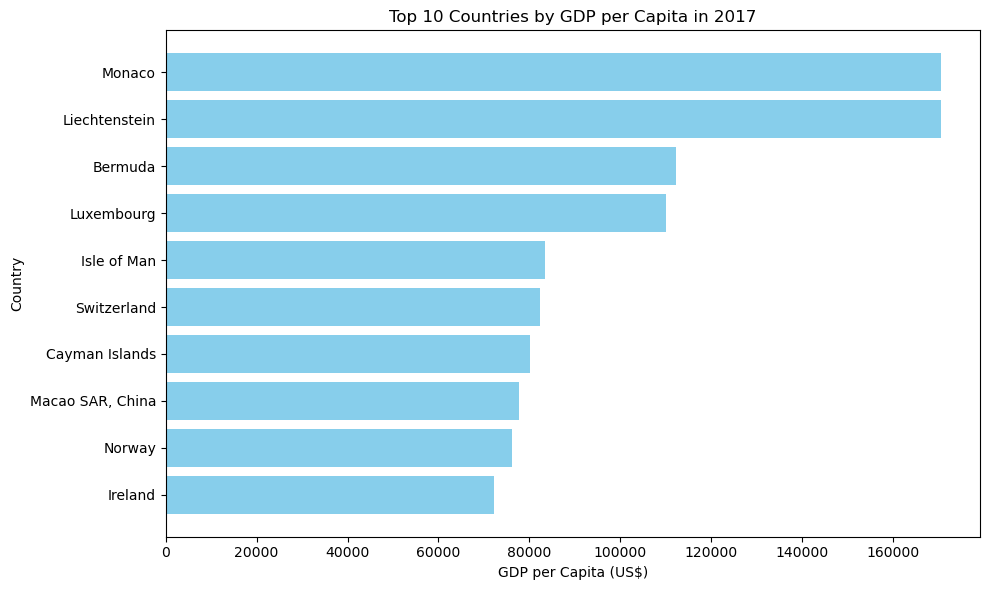

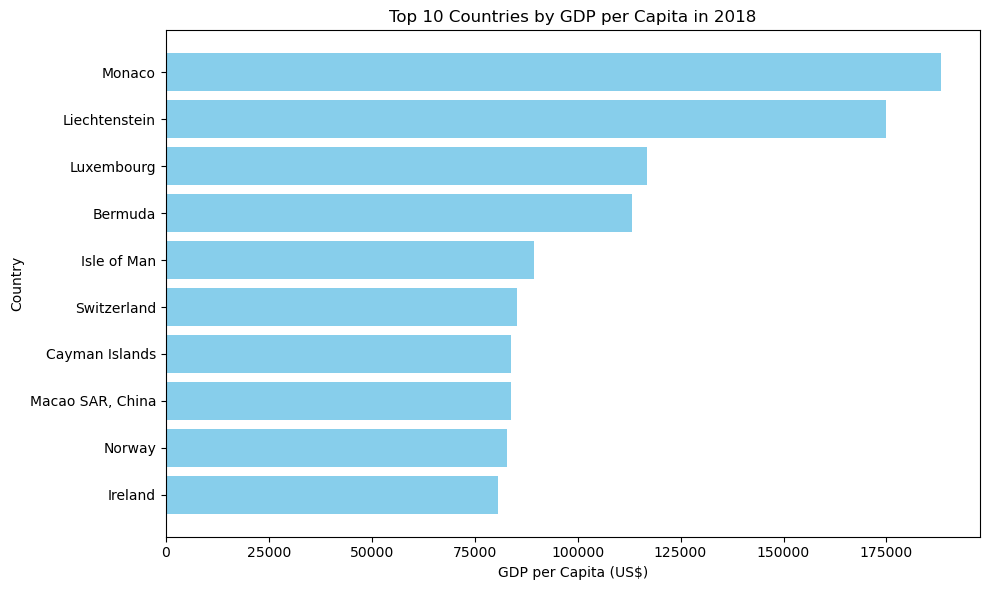

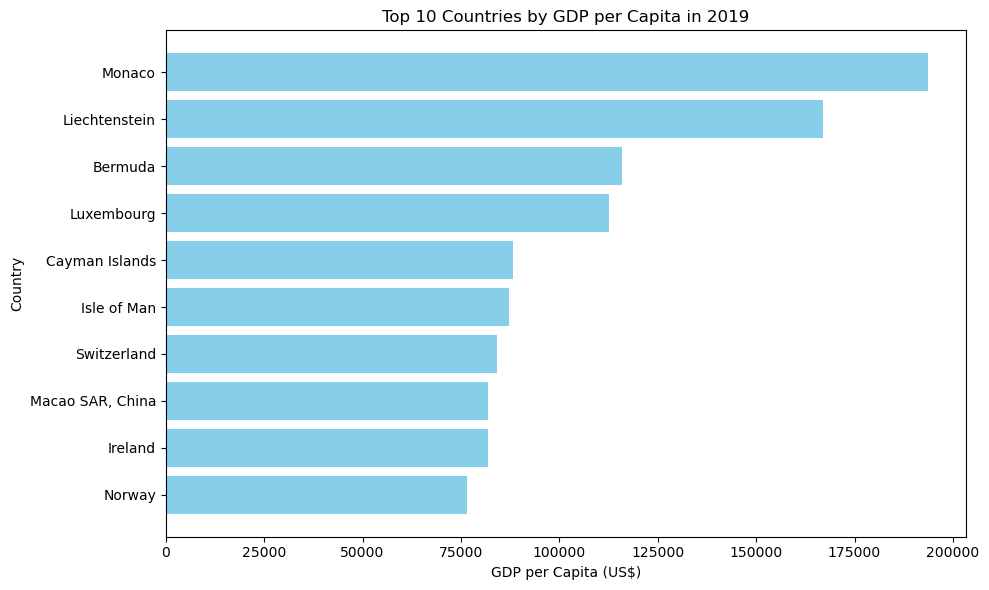

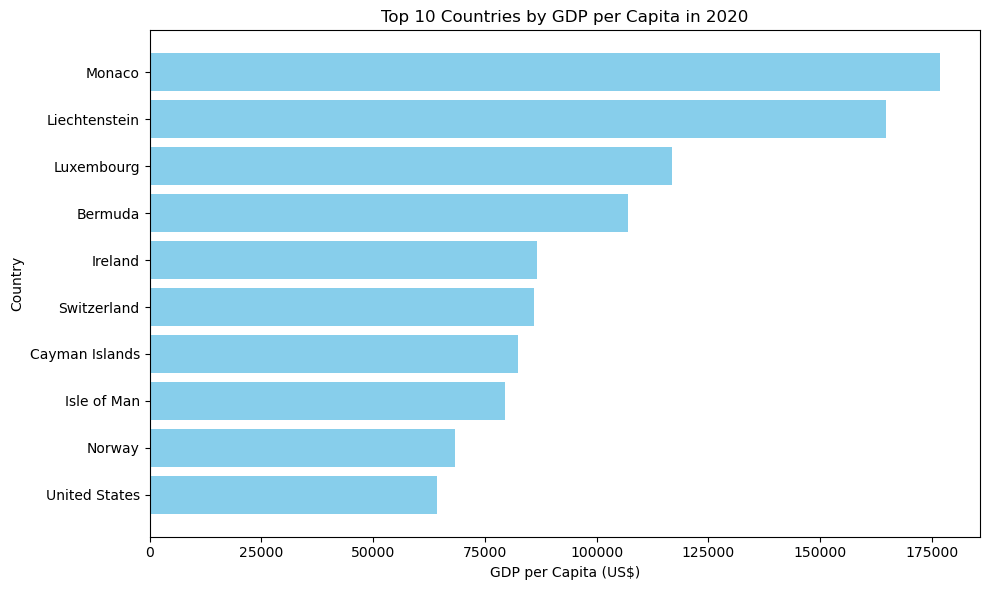

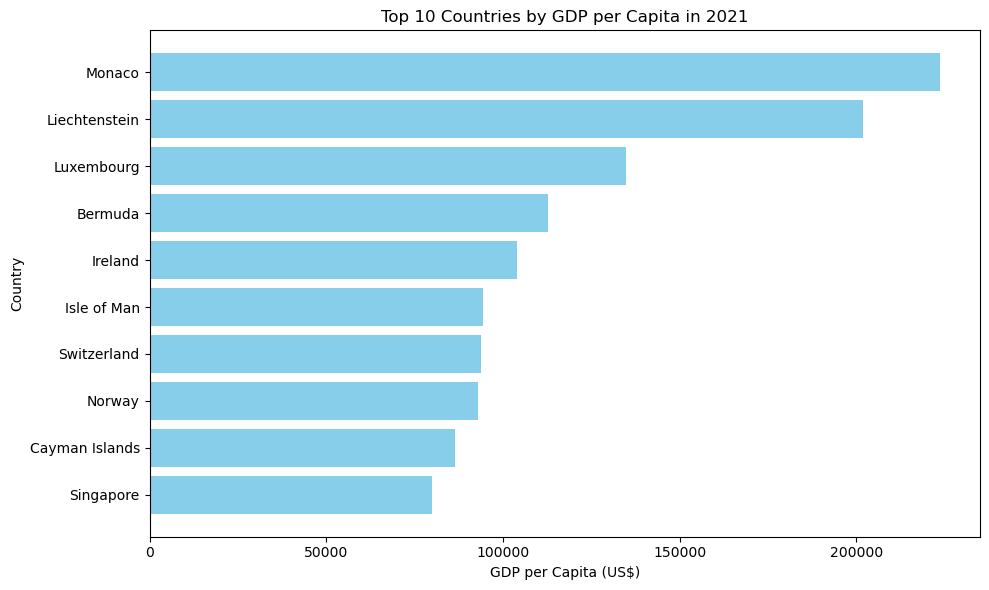

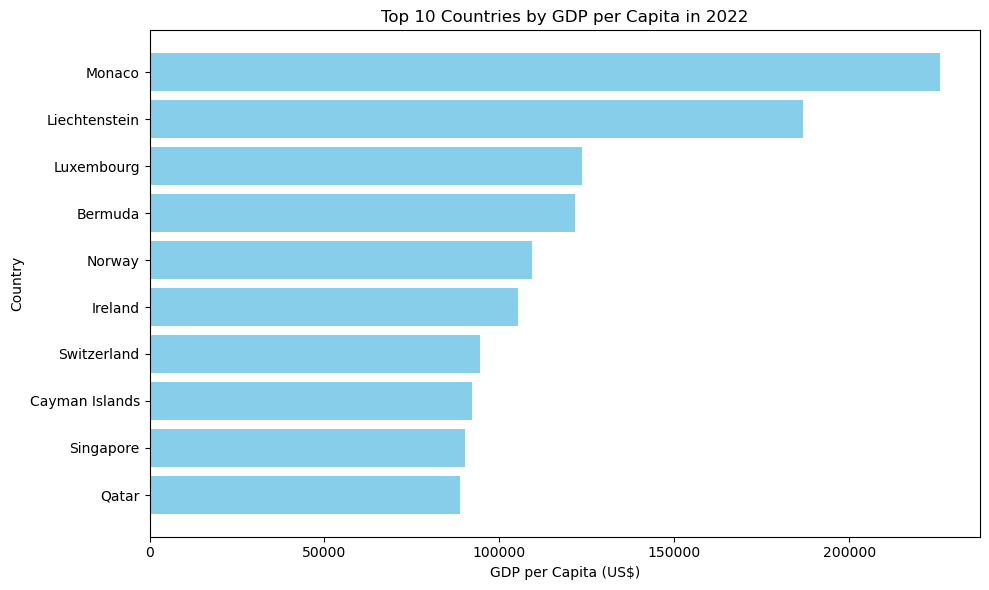

In [137]:
# We loop through each year and make a separate plot
for year, group in top10_per_year_gdp.groupby("year"):
    plt.figure(figsize=(10, 6))
    group_sorted = group.sort_values("gdp_per_capita", ascending=False)
    plt.barh(group_sorted["country"], group_sorted["gdp_per_capita"], color="skyblue")
    plt.xlabel("GDP per Capita (US$)")
    plt.ylabel("Country")
    plt.title(f"Top 10 Countries by GDP per Capita in {year}")
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

##### Goverment Expenditures on Education

Explanation
Step 1 cleans the placeholder values and fixes data types so interpolation works correctly.

Step 2 removes the problematic years (1990 and 2024).

Step 3 performs row-wise linear interpolation across years so that missing values are filled using values from adjacent years.

Step 4 lets you confirm if any missing values remain after interpolation.

In [141]:
top10_per_year_edu = (
    edu_long
    .sort_values(["year", "gov_edu_exp"], ascending=[True, False])
    .groupby("year")
    .head(10)
    .reset_index(drop=True)
)

print(top10_per_year_edu)

                  country  gov_edu_exp  year
0                Kiribati    13.575000  2017
1   Micronesia, Fed. Sts.    12.416000  2017
2        Marshall Islands     9.920570  2017
3                 Namibia     9.708673  2017
4         Solomon Islands     9.643546  2017
5                    Cuba     9.046969  2017
6                 Bolivia     8.097240  2017
7                  Norway     7.845980  2017
8                Botswana     7.809245  2017
9                 Iceland     7.583860  2017
10               Kiribati    15.377000  2018
11       Marshall Islands     9.920570  2018
12  Micronesia, Fed. Sts.     9.697000  2018
13        Solomon Islands     9.643546  2018
14                   Cuba     9.046969  2018
15                Namibia     8.881123  2018
16                Vanuatu     8.606347  2018
17                Bolivia     8.015870  2018
18               Botswana     7.905386  2018
19                 Sweden     7.640840  2018
20               Kiribati    13.768655  2019
21  Micron

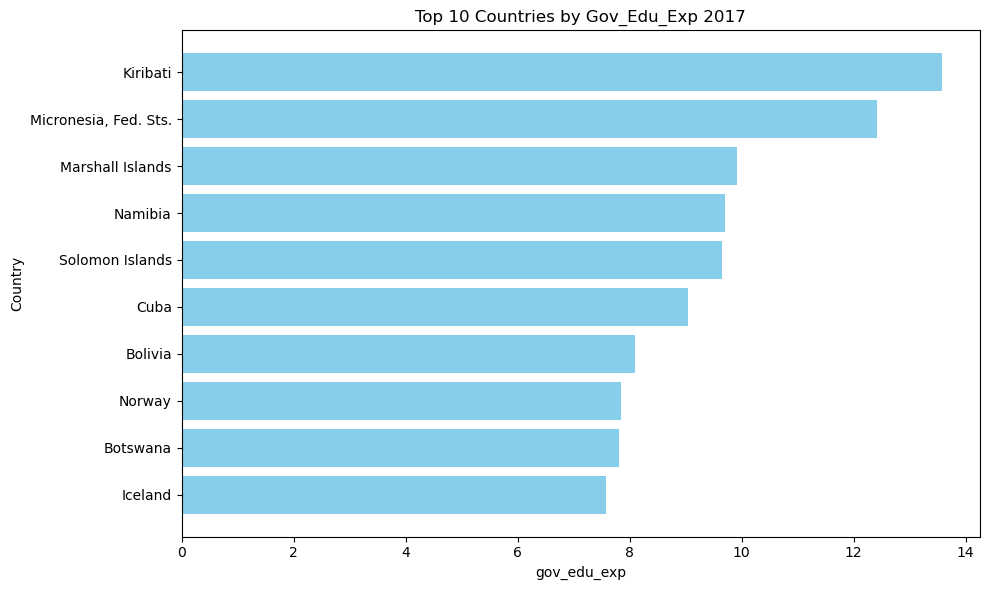

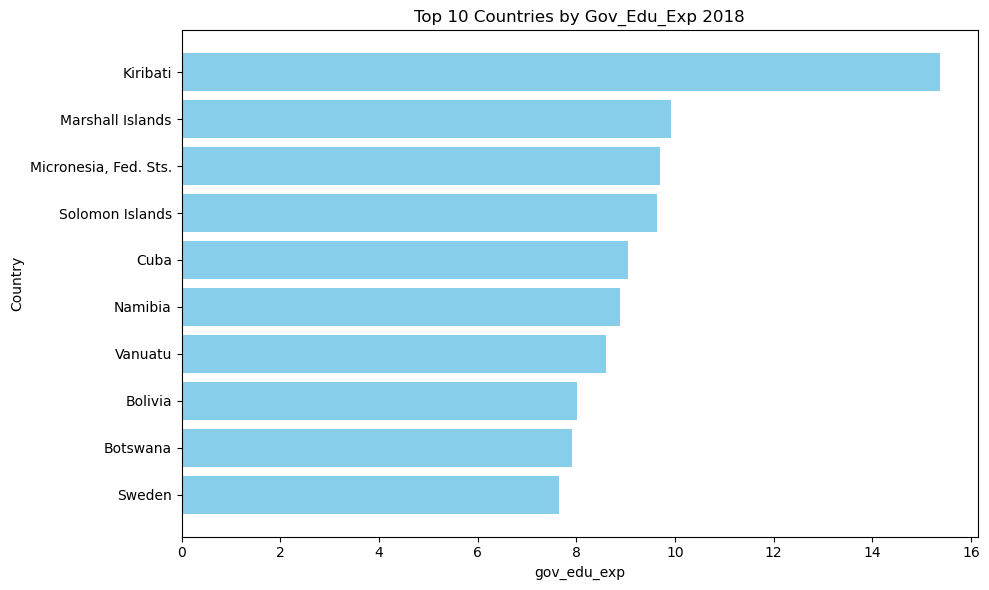

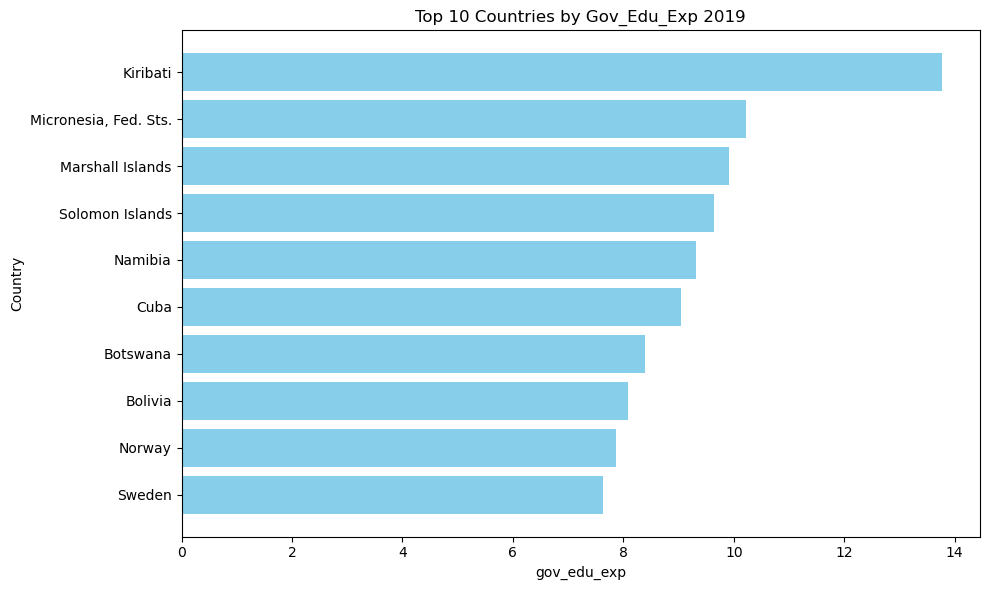

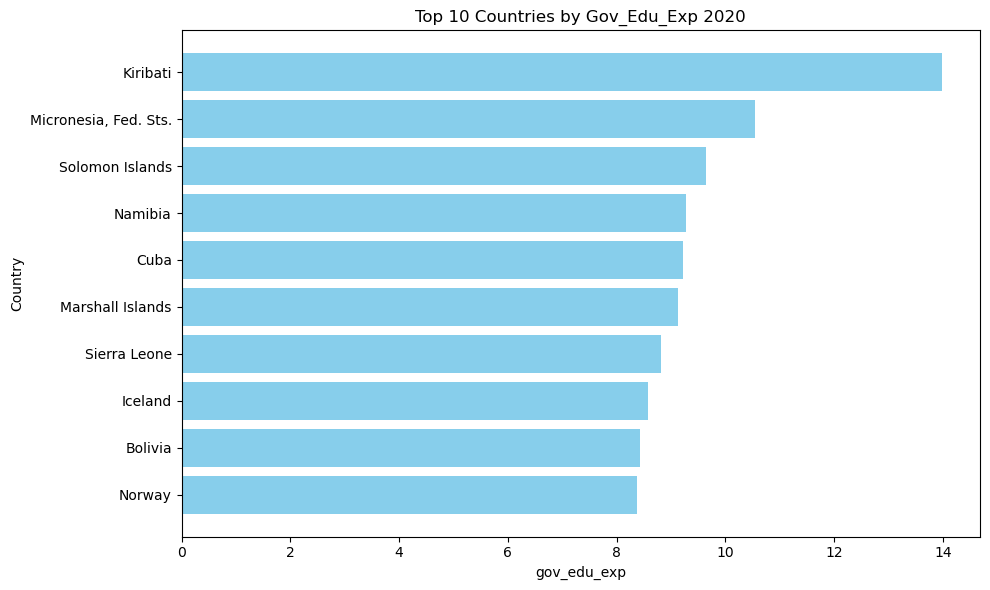

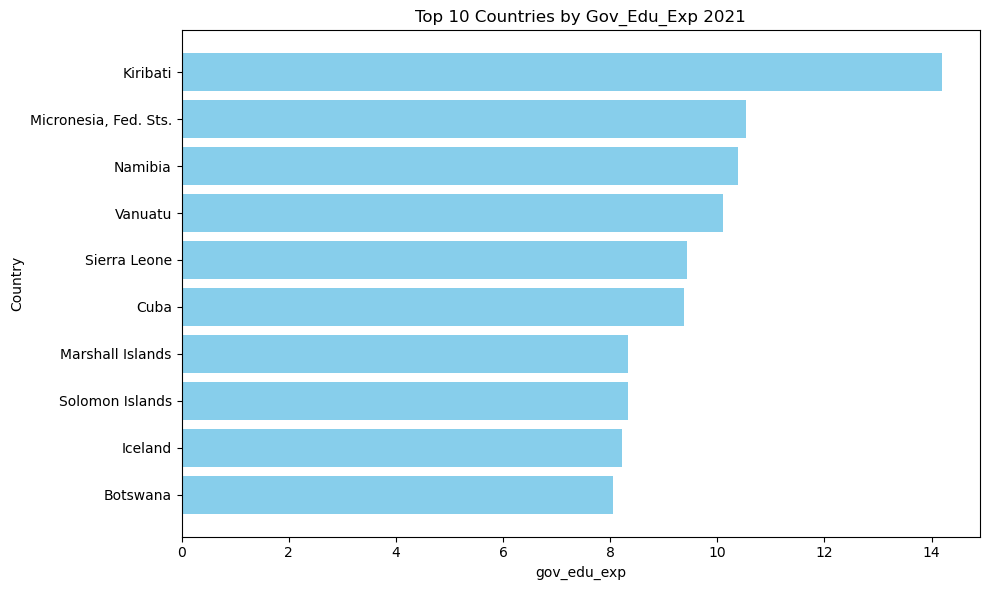

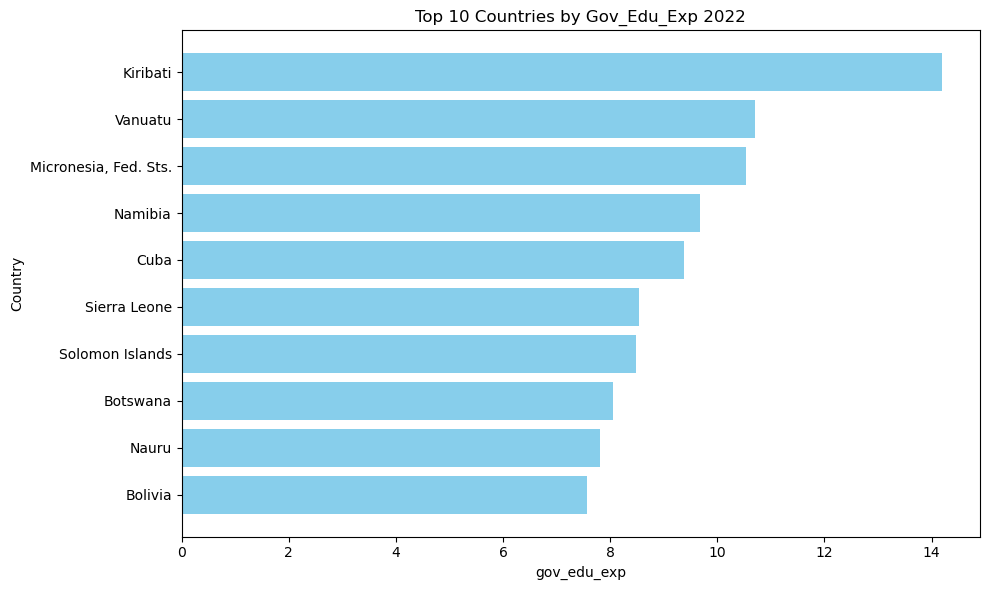

In [143]:
# Save to CSV
top10_per_year_edu.to_csv("top10_edu_per_year.csv", index=False)

# Loop through each year and make a separate plot
for year, group in top10_per_year_edu.groupby("year"):
    plt.figure(figsize=(10, 6))
    group_sorted = group.sort_values("gov_edu_exp", ascending=False)
    plt.barh(group_sorted["country"], group_sorted["gov_edu_exp"], color="skyblue")
    plt.xlabel("gov_edu_exp")
    plt.ylabel("Country")
    plt.title(f"Top 10 Countries by Gov_Edu_Exp {year}")
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

#### Goverment Effectivness

In [149]:
top10_per_year_gov = (
    gov_pct_long
    .sort_values(["year", "gov_effectiveness"], ascending=[True, False])
    .groupby("year")
    .head(10)
    .reset_index(drop=True)
)

print(top10_per_year_gov)

                 country  gov_effectiveness  year
0              Singapore         100.000000  2017
1            Switzerland          99.523811  2017
2                Finland          99.047623  2017
3                 Norway          98.571426  2017
4                Andorra          98.095238  2017
5                 Monaco          98.095238  2017
6   Hong Kong SAR, China          97.142860  2017
7                 Canada          96.666664  2017
8            Netherlands          96.190475  2017
9                Denmark          95.714287  2017
10             Singapore         100.000000  2018
11               Finland          99.523811  2018
12           Switzerland          99.047623  2018
13               Andorra          98.571426  2018
14                Monaco          98.571426  2018
15  Hong Kong SAR, China          97.619049  2018
16                Norway          97.142860  2018
17               Denmark          96.666664  2018
18           Netherlands          96.190475  2018


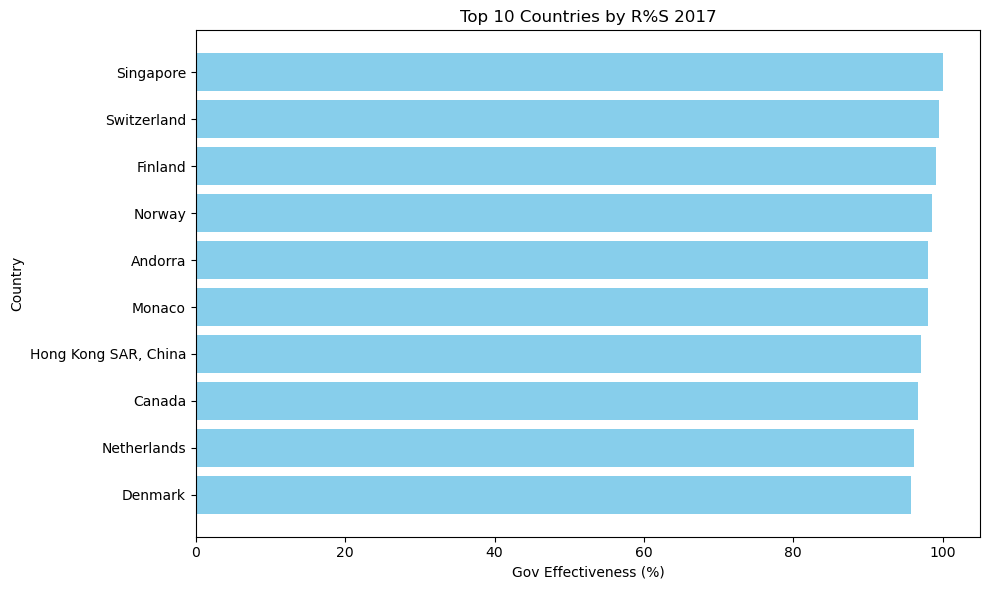

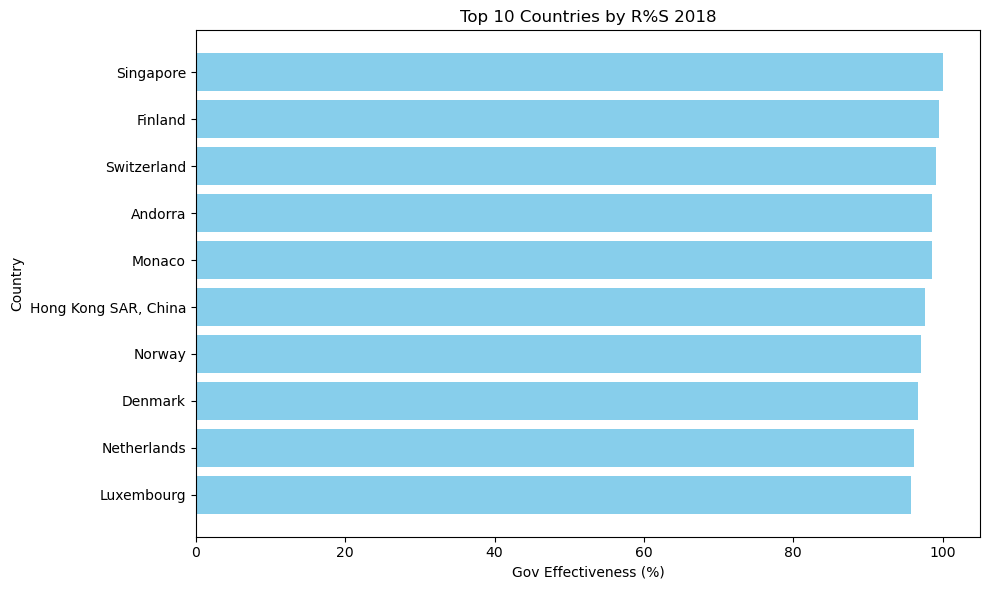

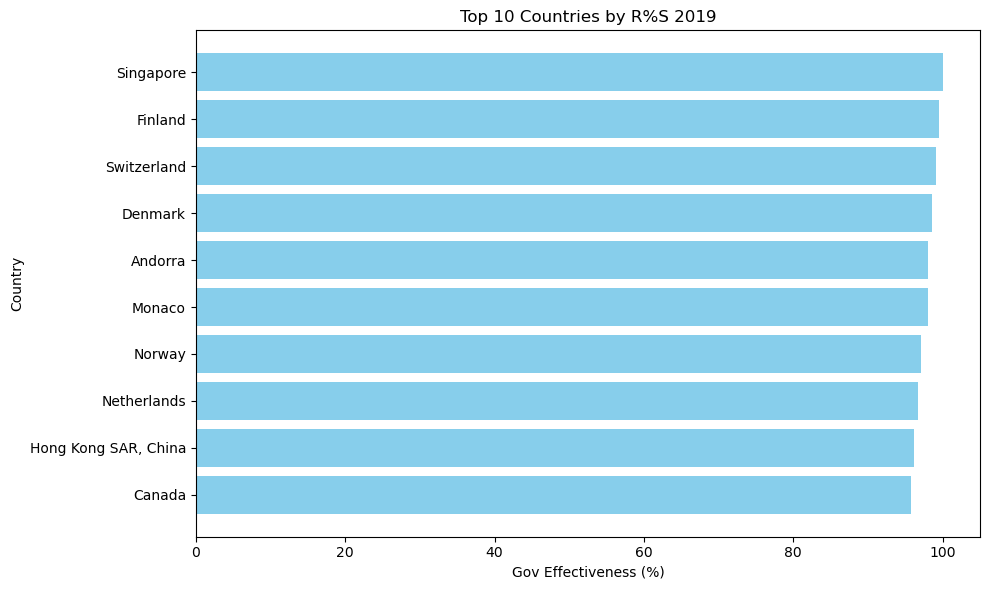

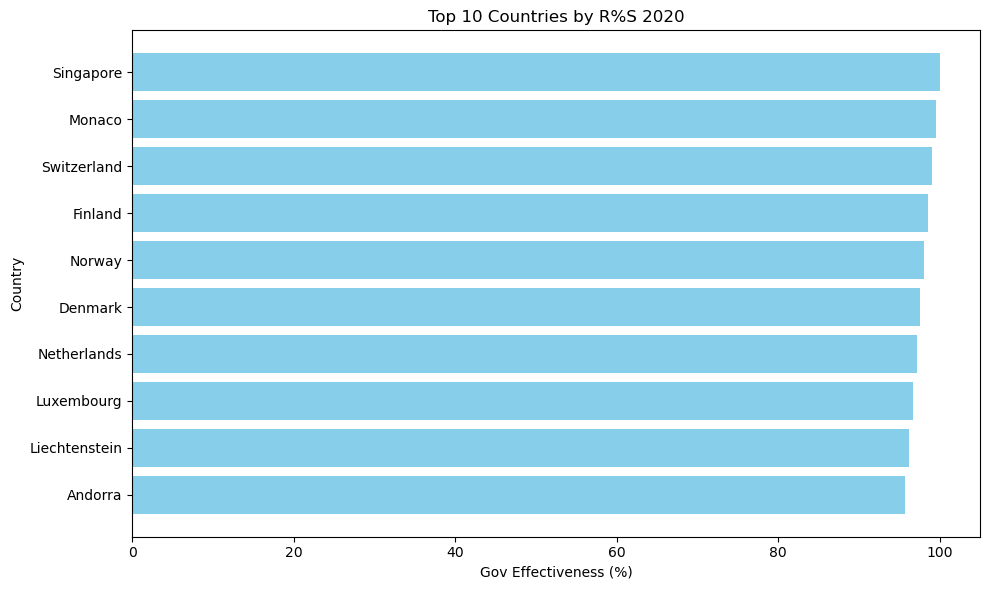

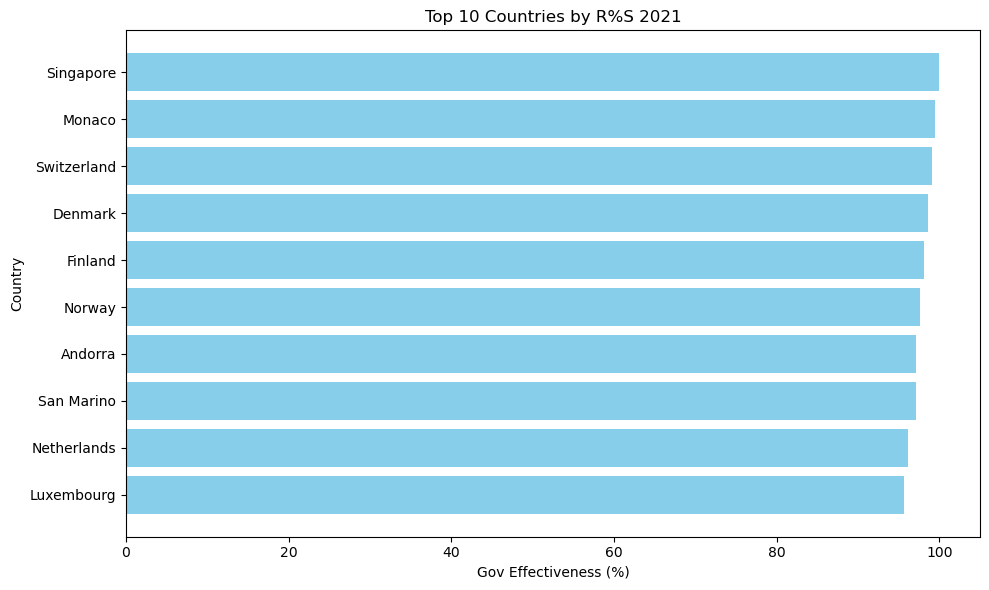

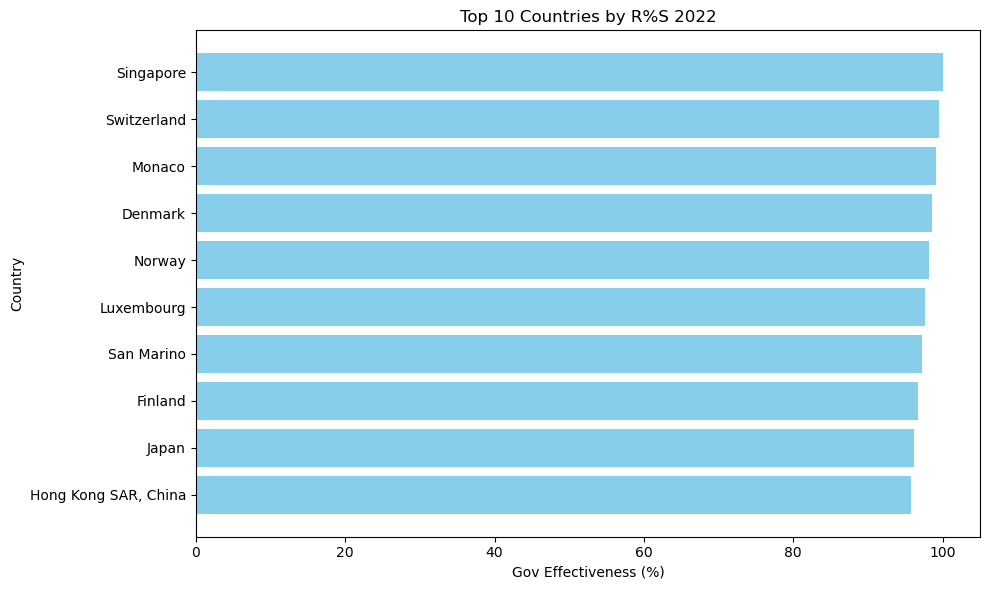

In [151]:
# We loop through each year and make a separate plot
for year, group in top10_per_year_gov.groupby("year"):
    plt.figure(figsize=(10, 6))
    group_sorted = group.sort_values("gov_effectiveness", ascending=False)
    plt.barh(group_sorted["country"], group_sorted["gov_effectiveness"], color="skyblue")
    plt.xlabel("Gov Effectiveness (%)")
    plt.ylabel("Country")
    plt.title(f"Top 10 Countries by R%S {year}")
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

#### Research and Development

In [153]:
top10_per_year_res = (
    res_long
    .sort_values(["year", "rd_exp_gdp"], ascending=[True, False])
    .groupby("year")
    .head(10)
    .reset_index(drop=True)
)

print(top10_per_year_res)

          country  rd_exp_gdp  year
0   Liechtenstein    5.868330  2017
1          Israel    4.743060  2017
2     Korea, Rep.    4.292060  2017
3          Sweden    3.362790  2017
4           Japan    3.166360  2017
5     Switzerland    3.076980  2017
6         Austria    3.056560  2017
7         Germany    3.047100  2017
8         Denmark    2.931240  2017
9   United States    2.883570  2017
10  Liechtenstein    5.868330  2018
11         Israel    4.914510  2018
12    Korea, Rep.    4.516330  2018
13         Sweden    3.321060  2018
14          Japan    3.219200  2018
15    Switzerland    3.136890  2018
16        Germany    3.110110  2018
17        Austria    3.091820  2018
18  United States    2.990450  2018
19        Denmark    2.966030  2018
20  Liechtenstein    5.868330  2019
21         Israel    5.330990  2019
22    Korea, Rep.    4.627030  2019
23         Sweden    3.387580  2019
24          Japan    3.218240  2019
25    Switzerland    3.196800  2019
26        Germany    3.16701

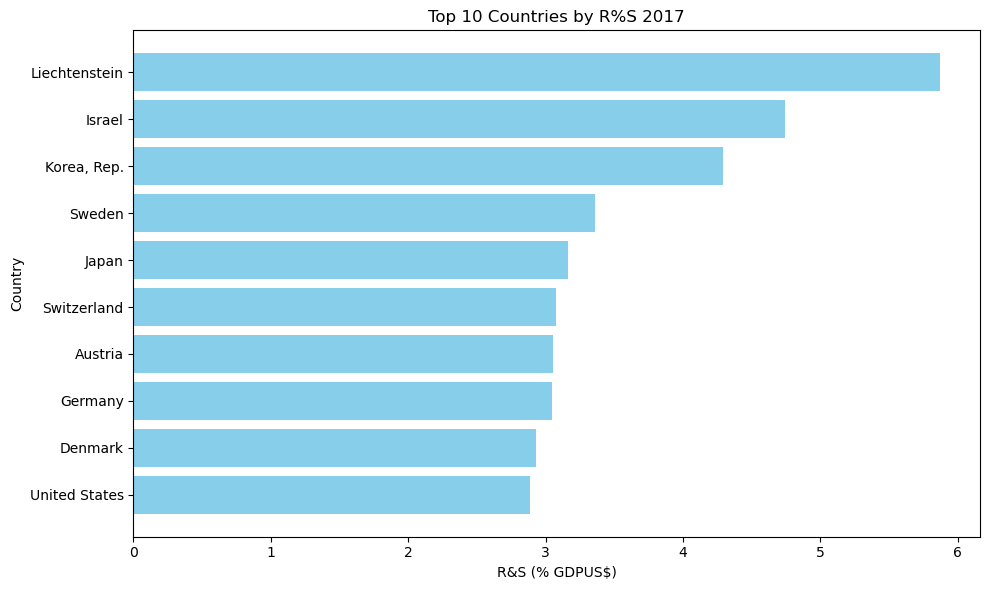

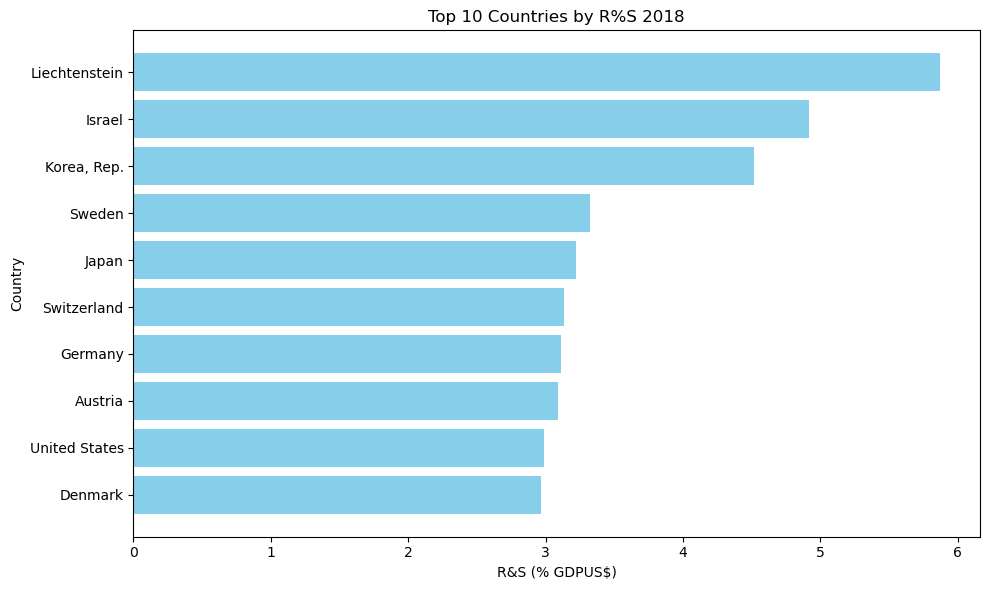

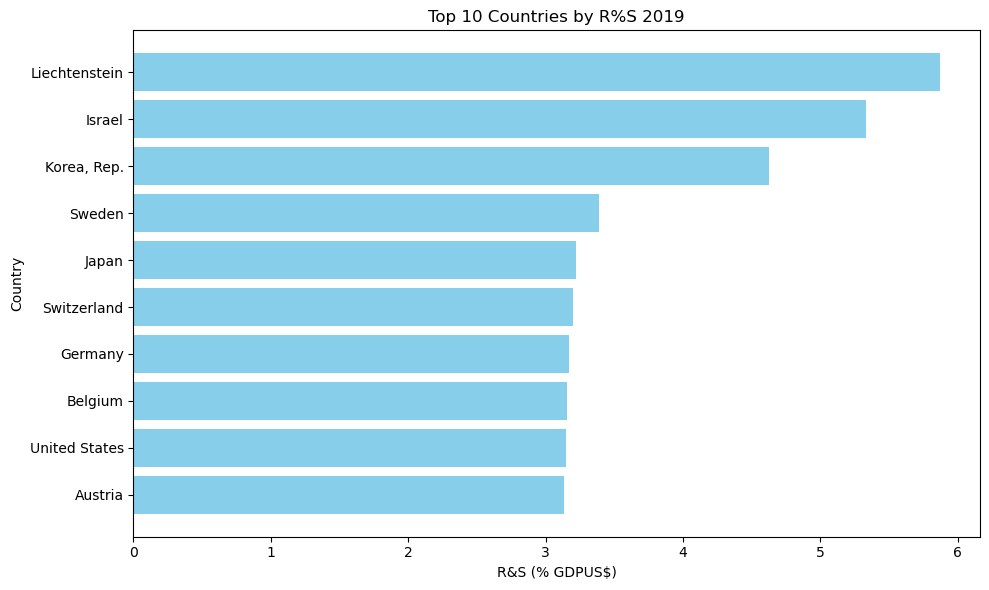

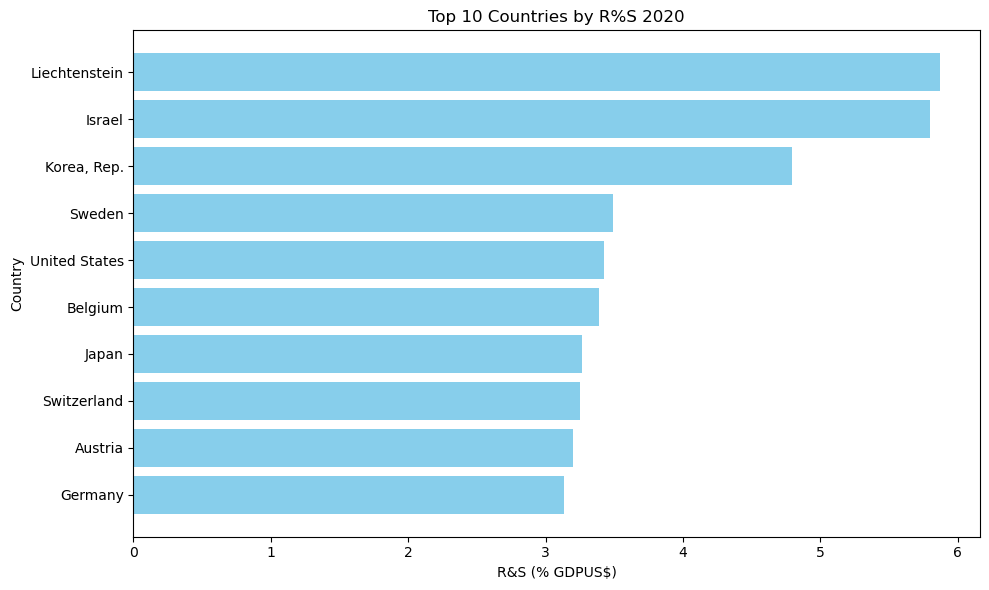

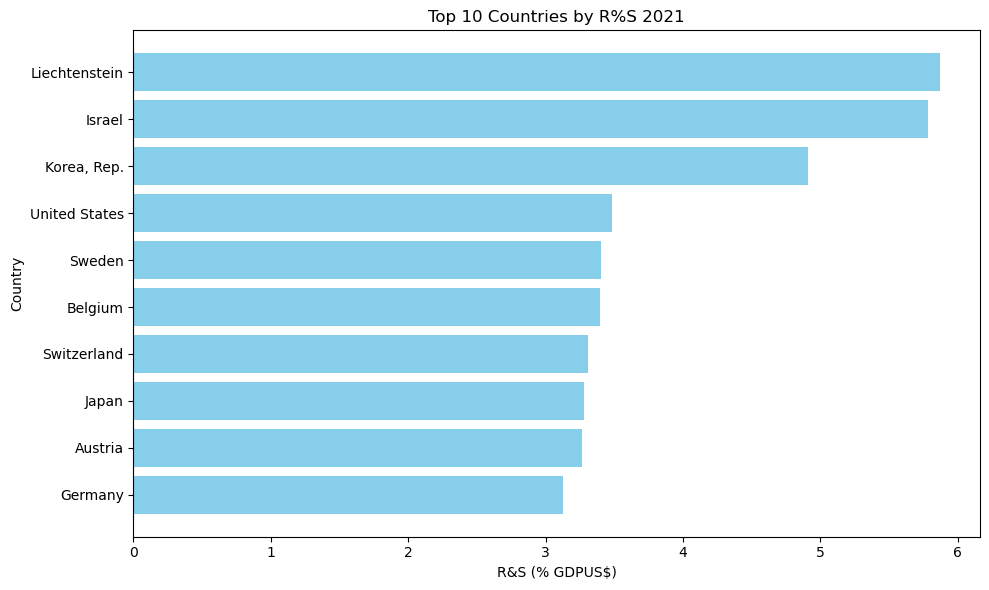

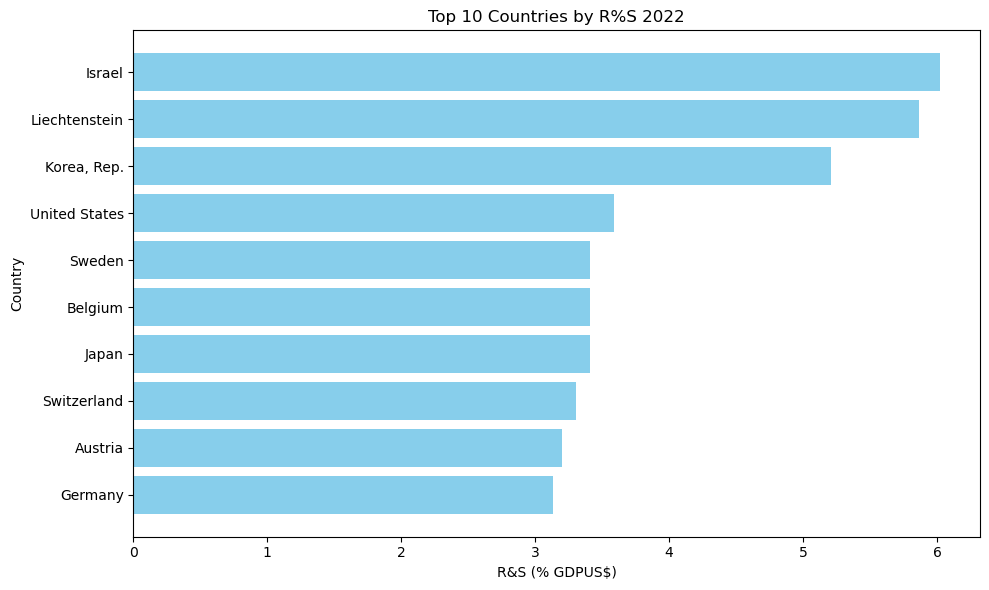

In [155]:
# We loop through each year and make a separate plot
for year, group in top10_per_year_res.groupby("year"):
    plt.figure(figsize=(10, 6))
    group_sorted = group.sort_values("rd_exp_gdp", ascending=False)
    plt.barh(group_sorted["country"], group_sorted["rd_exp_gdp"], color="skyblue")
    plt.xlabel("R&S (% GDPUS$)")
    plt.ylabel("Country")
    plt.title(f"Top 10 Countries by R%S {year}")
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

### Comparative Analysis - Function and Python Code

In [202]:
# Sort by year, then total_score descending
top10_total_score_df = (
    total_score_df
    .sort_values(["year", "total_score"], ascending=[True, False])
    .groupby("year")
    .head(10)  # top 10 per year
    .reset_index(drop=True)
)

print(top10_total_score_df)

    year           country  total_score
0   2017     United States       4027.7
1   2017    United Kingdom       2432.8
2   2017           Germany        980.5
3   2017         Australia        884.1
4   2017            Canada        733.1
5   2017             Japan        726.2
6   2017       Netherlands        699.9
7   2017            France        664.6
8   2017  China (Mainland)        656.0
9   2017       Switzerland        515.3
10  2018     United States       3910.3
11  2018    United Kingdom       2357.1
12  2018         Australia        983.3
13  2018           Germany        950.3
14  2018            Canada        734.1
15  2018       Netherlands        701.7
16  2018             Japan        697.1
17  2018  China (Mainland)        590.5
18  2018            France        553.4
19  2018       South Korea        552.1
20  2019     United States       3739.8
21  2019    United Kingdom       2257.3
22  2019         Australia        941.1
23  2019           Germany        878.1


In [204]:
from typing import Literal, Dict, Any
import pandas as pd

def compute_yearly_overlaps(
    top10_indicator: pd.DataFrame,
    top10_total_score: pd.DataFrame,
    indicator_name: str,
    *,
    year_col: str = "year",
    country_col: str = "country",
    baseline: Literal["score", "indicator", "union"] = "score",
    verbose: bool = True,
) -> tuple[pd.DataFrame, Dict[str, Any]]:
    """
    Compute year-by-year overlaps between a Top-10 indicator list and the Top-10 Total Score list.

    Parameters
    ----------
    top10_indicator : DataFrame
        Must contain columns [year_col, country_col] for the indicator Top-10 per year.
    top10_total_score : DataFrame
        Must contain columns [year_col, country_col] for the Total Score Top-10 per year.
    indicator_name : str
        A label for the indicator (e.g., "GDP", "Primary", "Gov_Effectiveness", "R&D").
    year_col : str
        Name of the year column (default "year").
    country_col : str
        Name of the country column (default "country").
    baseline : {"score", "indicator", "union"}
        What to use in the denominator for the overlap percentage:
        - "score": size of Total Score list (default; matches your previous snippets)
        - "indicator": size of the indicator list
        - "union": size of the union of both lists
    verbose : bool
        If True, prints a per-year line and totals.

    Returns
    -------
    results_df : DataFrame
        Columns: [year, indicator, overlap_count, baseline_count, overlap_pct, overlap_countries]
    totals : dict
        {
          "indicator": str,
          "total_overlap_sum": int,
          "total_baseline_sum": int,
          "total_pct_sum": float,
          "unique_overlap_countries": set,
          "unique_union_countries": set,
          "unique_overlap_pct": float
        }
    """

    # Ensure required columns exist
    for df, name in [(top10_indicator, "top10_indicator"), (top10_total_score, "top10_total_score")]:
        missing = {year_col, country_col} - set(df.columns)
        if missing:
            raise ValueError(f"{name} is missing columns: {missing}")

    # Gather all years present in either dataframe
    years = sorted(set(top10_indicator[year_col].unique()).union(set(top10_total_score[year_col].unique())))

    # Accumulators
    rows = []
    total_overlap_sum = 0
    total_baseline_sum = 0
    all_overlap_countries = set()
    all_union_countries = set()

    for year in years:
        ind_countries = set(top10_indicator.loc[top10_indicator[year_col] == year, country_col])
        score_countries = set(top10_total_score.loc[top10_total_score[year_col] == year, country_col])

        overlap = ind_countries & score_countries

        if baseline == "score":
            denom = len(score_countries)
        elif baseline == "indicator":
            denom = len(ind_countries)
        elif baseline == "union":
            denom = len(ind_countries | score_countries)
        else:
            raise ValueError("baseline must be one of {'score','indicator','union'}")

        overlap_pct = (len(overlap) / denom * 100) if denom else 0.0

        # Track totals (sum-based uses same denominator choice as your previous code: size of score list)
        total_overlap_sum += len(overlap)
        total_baseline_sum += len(score_countries)  # keep consistent with your earlier snippets

        # Unique (set-based) accumulators
        all_overlap_countries |= overlap
        all_union_countries |= (ind_countries | score_countries)

        rows.append({
            "year": year,
            "indicator": indicator_name,
            "overlap_count": len(overlap),
            "baseline_count": denom,
            "overlap_pct": round(overlap_pct, 1),
            "overlap_countries": sorted(overlap),
        })

        if verbose:
            print(f"{year} → Overlap: {len(overlap)} countries ({overlap_pct:.1f}%) → {sorted(overlap)}")

    # Totals
    total_pct_sum = (total_overlap_sum / total_baseline_sum * 100) if total_baseline_sum else 0.0
    unique_overlap_pct = (len(all_overlap_countries) / len(all_union_countries) * 100) if all_union_countries else 0.0

    if verbose:
        print("\n=== TOTAL (sum-based) ===")
        print(f"Overlaps: {total_overlap_sum} over baseline {total_baseline_sum} → {total_pct_sum:.1f}%")
        print("=== UNIQUE (set-based across period) ===")
        print(f"Unique overlap countries: {len(all_overlap_countries)} / {len(all_union_countries)} "
              f"({unique_overlap_pct:.1f}%)")

    results_df = pd.DataFrame(rows)
    totals = {
        "indicator": indicator_name,
        "total_overlap_sum": total_overlap_sum,
        "total_baseline_sum": total_baseline_sum,
        "total_pct_sum": round(total_pct_sum, 1),
        "unique_overlap_countries": all_overlap_countries,
        "unique_union_countries": all_union_countries,
        "unique_overlap_pct": round(unique_overlap_pct, 1),
    }
    return results_df, totals

In [208]:
gdp_df, gdp_totals = compute_yearly_overlaps(top10_per_year_gdp, top10_total_score_df, 
                                             "GDP", baseline="score")
edu_df, edu_totals = compute_yearly_overlaps(top10_per_year_edu, top10_total_score_df, 
                                             "Education", baseline="score")
gov_df, gov_totals = compute_yearly_overlaps(top10_per_year_gov, top10_total_score_df, 
                                             "Gov_Effectiveness", baseline="score")
res_df, res_totals = compute_yearly_overlaps(top10_per_year_res, top10_total_score_df, 
                                             "R&D", baseline="score")

2017 → Overlap: 1 countries (10.0%) → ['Switzerland']
2018 → Overlap: 0 countries (0.0%) → []
2019 → Overlap: 0 countries (0.0%) → []
2020 → Overlap: 2 countries (20.0%) → ['Switzerland', 'United States']
2021 → Overlap: 1 countries (10.0%) → ['Switzerland']
2022 → Overlap: 1 countries (10.0%) → ['Switzerland']

=== TOTAL (sum-based) ===
Overlaps: 5 over baseline 60 → 8.3%
=== UNIQUE (set-based across period) ===
Unique overlap countries: 2 / 22 (9.1%)
2017 → Overlap: 0 countries (0.0%) → []
2018 → Overlap: 0 countries (0.0%) → []
2019 → Overlap: 0 countries (0.0%) → []
2020 → Overlap: 0 countries (0.0%) → []
2021 → Overlap: 0 countries (0.0%) → []
2022 → Overlap: 0 countries (0.0%) → []

=== TOTAL (sum-based) ===
Overlaps: 0 over baseline 60 → 0.0%
=== UNIQUE (set-based across period) ===
Unique overlap countries: 0 / 25 (0.0%)
2017 → Overlap: 3 countries (30.0%) → ['Canada', 'Netherlands', 'Switzerland']
2018 → Overlap: 1 countries (10.0%) → ['Netherlands']
2019 → Overlap: 2 countrie

### Overlap Analysis: Economic Indicators vs. Total Score Top‑10

#### GDP (per capita)
| Indicator | Year | Overlap Countries | Overlap Count | Overlap % |
|---|---:|---|---:|---:|
| GDP | 2017 | Switzerland | 1 | 10.0% |
|  | 2018 |  | 0 | 0.0% |
|  | 2019 |  | 0 | 0.0% |
|  | 2020 | Switzerland, United States | 2 | 20.0% |
|  | 2021 | Switzerland | 1 | 10.0% |
|  | 2022 | Switzerland | 1 | 10.0% |
|  | 2023 |  | 0 | 0.0% |
|  | 2024 |  | 0 | 0.0% |
| **TOTAL** |  |  | **5 / 60** | **8.3%** |

#### Government Expenditure on Education (% of GDP)
| Indicator | Year | Overlap Countries | Overlap Count | Overlap % |
|---|---:|---|---:|---:|
| Gov. Exp. Edu | 2017 |  | 0 | 0.0% |
|  | 2018 |  | 0 | 0.0% |
|  | 2019 |  | 0 | 0.0% |
|  | 2020 |  | 0 | 0.0% |
|  | 2021 |  | 0 | 0.0% |
|  | 2022 |  | 0 | 0.0% |
|  | 2023 |  | 0 | 0.0% |
| **TOTAL** |  |  | **0 / 60** | **0.0%** |

#### R&D Expenditure (% of GDP)
| Indicator | Year | Overlap Countries | Overlap Count | Overlap % |
|---|---:|---|---:|---:|
| R&D | 2017 | Canada, Netherlands, Switzerland | 3 | 30.0% |
|  | 2018 | Netherlands | 1 | 10.0% |
|  | 2019 | Canada, Netherlands | 2 | 20.0% |
|  | 2020 | Netherlands, Switzerland | 2 | 20.0% |
|  | 2021 | Netherlands, Switzerland | 2 | 20.0% |
|  | 2022 | Japan, Switzerland | 2 | 20.0% |
|  | 2023 |  | 0 | 0.0% |
| **TOTAL** |  |  | **12 / 60** | **20.0%** |

#### Government Effectiveness (Percentile Rank)
| Indicator | Year | Overlap Countries | Overlap Count | Overlap % |
|---|---:|---|---:|---:|
| Gov. Effectiveness | 2017 | Germany, Japan, Switzerland, United States | 4 | 40.0% |
|  | 2018 | Germany, Japan, United States | 3 | 30.0% |
|  | 2019 | Germany, Japan, United States | 3 | 30.0% |
|  | 2020 | Japan, Switzerland, United States | 3 | 30.0% |
|  | 2021 | Japan, Switzerland, United States | 3 | 30.0% |
|  | 2022 | Japan, Switzerland, United States | 3 | 30.0% |
|  | 2023 |  | 0 | 0.0% |
| **TOTAL** |  |  | **19 / 60** | **31.7%** |

#### Discussion
Government Effectiveness shows the highest overlap (31.7%) with Total Score Top-10 countries, suggesting that better governance may be strongly associated with higher university rankings.

R&D Expenditure also shows a moderate connection (20%), which aligns with the idea that investment in research contributes to academic excellence.

GDP has only an 8.3% overlap, indicating that wealth alone does not guarantee top-ranked universities.

Government Expenditure on Education has 0% overlap in this dataset, implying that the level of education spending as % of GDP might not directly align with countries hosting top universities — other factors may play a stronger role.

Brief discussion
Government Effectiveness shows the strongest alignment (31.7%) with the rankings’ Top‑10—consistent, repeated overlaps across years.

R&D Expenditure is moderately aligned (20%), which fits the intuition that research investment supports top university ecosystems.

GDP’s overlap is low (8.3%), suggesting national wealth alone isn’t a sufficient signal for hosting many top‑ranked universities.

Education spending (% of GDP) shows no overlap in your Top‑10 sets. This could reflect (i) differing time lags, (ii) measurement as a percentage rather than absolute spend, or (iii) efficiency differences—i.e., how funds are used may matter more than the share of GDP.

### Exploratory Data Analysis - Educational Indicators

Data Overview&Data Cleaning
For the University Ranking dataset, we will begin with a general data overview to understand its structure and content. This will include:

Displaying basic metadata such as the number of unique countries represented and the range of years covered.

Presenting a sample of rows to get a first look at the data format.

Examining column data types to ensure compatibility for further analysis.

Checking for missing values and assessing their extent and distribution.

Identifying and handling any duplicate entries.

In addition, we will explore basic descriptive statistics for numerical columns, review unique value counts for categorical fields, and check for potential inconsistencies in country or university names.

The data cleaning process ensures that the QS World University Ranking dataset is accurate, consistent, and ready for analysis. Key steps include:

Missing values: The dataset contains a total of 3,642 missing entries. Since our focus is on the top 300 universities, we first isolate this subset and identify 7 missing score values. These entries are removed, as their small proportion does not warrant imputation (e.g., mean or linear interpolation).

Standardization of country names: Country names are standardized to maintain consistency across records and to align with external datasets used for merging.

Outlier detection: We use boxplots to identify potential outliers in university scores. Special attention is given to countries with unusually high or low scores to assess whether these values are data errors or legitimate variations.

Data type verification: We ensure that numerical columns are correctly typed for statistical analysis and that categorical fields (e.g., country, university name) are stored as strings.

These steps provide a clean and consistent dataset, minimizing the risk of biases or errors in subsequent correlation, regression, and ranking analyses.

In [164]:
edu_world_df = pd.read_csv("data/world-education-data.csv")

In [166]:
edu_world_df.dtypes

country                        object
country_code                   object
year                            int64
gov_exp_pct_gdp               float64
lit_rate_adult_pct            float64
pri_comp_rate_pct             float64
pupil_teacher_primary         float64
pupil_teacher_secondary       float64
school_enrol_primary_pct      float64
school_enrol_secondary_pct    float64
school_enrol_tertiary_pct     float64
dtype: object

In [168]:
focus_cols = [
    "school_enrol_primary_pct",
    "school_enrol_secondary_pct",
    "school_enrol_tertiary_pct"
]

# 1. Overview of data types & non-null counts
print("=== Data Info ===")
edu_world_df[["country", "year"] + focus_cols].info()

# 2. Basic descriptive statistics
print("\n=== Descriptive Stats ===")
print(edu_world_df[focus_cols].describe())

# 3. Missing values count & percentage
print("\n=== Missing Values ===")
missing_summary = edu_world_df[focus_cols].isna().sum().to_frame("missing_count")
missing_summary["missing_pct"] = (missing_summary["missing_count"] / len(edu_world_df)) * 100
print(missing_summary)

# 4. Check duplicates
duplicate_rows = edu_world_df.duplicated(subset=["country", "year"])
print(f"\nNumber of duplicate country-year rows: {duplicate_rows.sum()}")

# 5. Sample rows
print("\n=== Sample Data ===")
print(edu_world_df[["country", "year"] + focus_cols].sample(5))

=== Data Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5892 entries, 0 to 5891
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   country                     5892 non-null   object 
 1   year                        5892 non-null   int64  
 2   school_enrol_primary_pct    5352 non-null   float64
 3   school_enrol_secondary_pct  4745 non-null   float64
 4   school_enrol_tertiary_pct   4392 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 230.3+ KB

=== Descriptive Stats ===
       school_enrol_primary_pct  school_enrol_secondary_pct  \
count               5352.000000                 4745.000000   
mean                 101.525234                   78.939810   
std                   13.029901                   28.350998   
min                    8.447979                    3.293810   
25%                   97.281084                   59.364799   
50%     

#### Data Cleaning
a) Handle missing values
If there are few missing values → drop them.

If there are many missing values → interpolate or impute.

**gross enrollment ratio** and net enrollment rate. The gross enrollment ratio includes all students enrolled in primary school, regardless of their age, while the net enrollment rate includes only those within the official primary school age range. Both are calculated as a percentage of the relevant population

In [171]:
focus_cols = [
    "school_enrol_primary_pct",
    "school_enrol_secondary_pct",
    "school_enrol_tertiary_pct",
]

# 0) Ensure numeric (coerce weird strings like '..' to NaN)
for c in focus_cols:
    edu_world_df[c] = pd.to_numeric(edu_world_df[c], errors="coerce")

# 1) Sort so interpolation makes sense over time
edu_world_df = edu_world_df.sort_values(["country", "year"])

# 2) Interpolate within each country (keeps index aligned)
edu_world_df[focus_cols] = (
    edu_world_df
      .groupby("country")[focus_cols]
      .transform(lambda g: g.interpolate(method="linear"))
)

# 3) Optional: fill any edges that interpolation can’t fill
edu_world_df[focus_cols] = (
    edu_world_df
      .groupby("country")[focus_cols]
      .transform(lambda g: g.ffill().bfill())
)

# 4) Quick check
print(edu_world_df[focus_cols].isna().sum())

school_enrol_primary_pct       35
school_enrol_secondary_pct     64
school_enrol_tertiary_pct     187
dtype: int64


In [172]:
# Missing counts
missing_counts = edu_world_df[focus_cols].isna().sum()

# Missing percentages
missing_pct = (missing_counts / len(edu_world_df)) * 100

# Combine into a nice DataFrame
missing_summary = pd.DataFrame({
    "missing_count": missing_counts,
    "missing_pct": missing_pct.round(2)  # Round to 2 decimal places
})

print(missing_summary)

                            missing_count  missing_pct
school_enrol_primary_pct               35         0.59
school_enrol_secondary_pct             64         1.09
school_enrol_tertiary_pct             187         3.17


In [174]:
# Duplicates by country-year
dups = edu_world_df.duplicated(["country", "year"]).sum()
print("Duplicate country-year rows:", dups)

Duplicate country-year rows: 0


In [177]:
# 2) Standardize country names (example)
edu_world_df["country"] = edu_world_df["country"].str.strip()
total_score_df["country"] = total_score_df["country"].str.strip()

# 3) Ensure numeric data for enrollment
for col in ["school_enrol_primary_pct", "school_enrol_secondary_pct", "school_enrol_tertiary_pct"]:
    edu_world_df[col] = pd.to_numeric(edu_world_df[col], errors="coerce")

# 4) Merge datasets on country & year
merged_edu_ind = pd.merge(
    total_score_df, 
    edu_world_df, 
    on=["country", "year"], 
    how="inner"
)

# Drop rows with missing values for correlation
merged_edu_ind = merged_edu_ind.dropna(subset=["total_score", "school_enrol_primary_pct",
                                               "school_enrol_secondary_pct", "school_enrol_tertiary_pct"])

print(merged_edu_ind.head())

   year    country  total_score country_code  gov_exp_pct_gdp  \
0  2017  Argentina         65.8          ARG         5.454320   
1  2017  Australia        884.1          AUS         5.321256   
2  2017    Austria        139.0          AUT         5.371590   
3  2017    Belgium        318.7          BEL         6.425340   
4  2017     Brazil        107.0          BRA         6.320480   

   lit_rate_adult_pct  pri_comp_rate_pct  pupil_teacher_primary  \
0                 NaN         101.581810                    NaN   
1                 NaN                NaN                    NaN   
2                 NaN          98.649178               10.01653   
3                 NaN                NaN               11.27695   
4                93.0                NaN               20.22308   

   pupil_teacher_secondary  school_enrol_primary_pct  \
0                      NaN                111.681458   
1                      NaN                100.637657   
2                  9.32983            

In [179]:
keep_cols = [
    "country",
    "year",
    "total_score",
    "school_enrol_primary_pct",
    "school_enrol_secondary_pct",
    "school_enrol_tertiary_pct"
]

merged_edu_ind_subset = merged_edu_ind[keep_cols].copy()

print(merged_edu_ind_subset.head())

     country  year  total_score  school_enrol_primary_pct  \
0  Argentina  2017         65.8                111.681458   
1  Australia  2017        884.1                100.637657   
2    Austria  2017        139.0                101.104568   
3    Belgium  2017        318.7                102.752861   
4     Brazil  2017        107.0                109.808510   

   school_enrol_secondary_pct  school_enrol_tertiary_pct  
0                  110.412407                  89.232941  
1                  153.576126                 109.993309  
2                  100.337898                  83.839256  
3                  158.670288                  80.773819  
4                  103.015961                  50.026749  


#### Primary

In [182]:
# --- Top 10 Primary ---
top10_primary = (
    merged_edu_ind_subset
    .sort_values(["year", "school_enrol_primary_pct"], ascending=[True, False])
    .groupby("year")
    .head(10)
    .reset_index(drop=True))

In [184]:
print(top10_primary.head(10))

        country  year  total_score  school_enrol_primary_pct  \
0        Sweden  2017        412.4                122.896057   
1         India  2017        188.0                117.868172   
2      Colombia  2017         77.4                113.305382   
3     Argentina  2017         65.8                111.681458   
4        Brazil  2017        107.0                109.808510   
5  Saudi Arabia  2017        129.3                106.085350   
6        Mexico  2017        104.4                105.797607   
7   Netherlands  2017        699.9                105.039421   
8  South Africa  2017         48.0                104.854881   
9      Thailand  2017         78.2                103.222161   

   school_enrol_secondary_pct  school_enrol_tertiary_pct  
0                  142.641586                  70.434250  
1                   74.597267                  27.909052  
2                   99.219330                  58.396042  
3                  110.412407                  89.232941  


#### Secondary 

In [187]:
# --- Top 10 Secondary ---
top10_secondary = (
   merged_edu_ind_subset
    .sort_values(["year", "school_enrol_secondary_pct"], ascending=[True, False])
    .groupby("year")
    .head(10)
    .reset_index(drop=True)
)

In [189]:
print(top10_secondary.head(10))

          country  year  total_score  school_enrol_primary_pct  \
0         Belgium  2017        318.7                102.752861   
1         Finland  2017        164.5                 99.468208   
2       Australia  2017        884.1                100.637657   
3          Sweden  2017        412.4                122.896057   
4         Denmark  2017        191.5                100.778030   
5  United Kingdom  2017       2432.8                100.695221   
6         Ireland  2017        191.1                100.852783   
7           Spain  2017        303.4                102.505119   
8          Norway  2017        149.4                 99.271492   
9     Netherlands  2017        699.9                105.039421   

   school_enrol_secondary_pct  school_enrol_tertiary_pct  
0                  158.670288                  80.773819  
1                  153.583710                  90.698387  
2                  153.576126                 109.993309  
3                  142.641586        

#### Tertiary 

In [192]:
# --- Top 10 Tertiary ---
top10_tertiary = (
    merged_edu_ind_subset
    .sort_values(["year", "school_enrol_tertiary_pct"], ascending=[True, False])
    .groupby("year")
    .head(10)
    .reset_index(drop=True)
)

In [194]:
print(top10_tertiary.head(10))

         country  year  total_score  school_enrol_primary_pct  \
0      Australia  2017        884.1                100.637657   
1          Spain  2017        303.4                102.505119   
2        Finland  2017        164.5                 99.468208   
3          Chile  2017        101.4                101.396278   
4      Argentina  2017         65.8                111.681458   
5  United States  2017       4027.7                101.821442   
6      Singapore  2017        182.9                100.626953   
7        Austria  2017        139.0                101.104568   
8         Norway  2017        149.4                 99.271492   
9    Netherlands  2017        699.9                105.039421   

   school_enrol_secondary_pct  school_enrol_tertiary_pct  
0                  153.576126                 109.993309  
1                  120.555923                  91.887741  
2                  153.583710                  90.698387  
3                  102.294823                  8

### Comparative Analysis 

In [210]:
# We perform the overlap analysis for the three educational indicators and total_score

prim_df, prim_totals = compute_yearly_overlaps(top10_primary,
                                               top10_total_score_df, "Primary",  baseline="score")
sec_df,  sec_totals  = compute_yearly_overlaps(top10_secondary,
                                               top10_total_score_df, "Secondary", baseline="score")
ter_df,  ter_totals  = compute_yearly_overlaps(top10_tertiary,
                                               top10_total_score_df, "Tertiary",  baseline="score")

2017 → Overlap: 1 countries (10.0%) → ['Netherlands']
2018 → Overlap: 1 countries (10.0%) → ['Netherlands']
2019 → Overlap: 1 countries (10.0%) → ['Netherlands']
2020 → Overlap: 2 countries (20.0%) → ['Japan', 'Netherlands']
2021 → Overlap: 1 countries (10.0%) → ['Netherlands']
2022 → Overlap: 1 countries (10.0%) → ['Netherlands']

=== TOTAL (sum-based) ===
Overlaps: 7 over baseline 60 → 11.7%
=== UNIQUE (set-based across period) ===
Unique overlap countries: 2 / 25 (8.0%)
2017 → Overlap: 3 countries (30.0%) → ['Australia', 'Netherlands', 'United Kingdom']
2018 → Overlap: 3 countries (30.0%) → ['Australia', 'Netherlands', 'United Kingdom']
2019 → Overlap: 2 countries (20.0%) → ['Australia', 'United Kingdom']
2020 → Overlap: 2 countries (20.0%) → ['Australia', 'Netherlands']
2021 → Overlap: 2 countries (20.0%) → ['Australia', 'Netherlands']
2022 → Overlap: 2 countries (20.0%) → ['Australia', 'Netherlands']

=== TOTAL (sum-based) ===
Overlaps: 14 over baseline 60 → 23.3%
=== UNIQUE (set-

| Indicator (Enrollment %) | Year | Overlap Countries | Overlap Count | Overlap % |
|--------------------------|------|-------------------|---------------|-----------|
| **Primary**              | 2017 | Netherlands | 1 | 10.0% |
|                          | 2018 | Netherlands | 1 | 10.0% |
|                          | 2019 | Netherlands | 1 | 10.0% |
|                          | 2020 | Japan, Netherlands | 2 | 20.0% |
|                          | 2021 | Netherlands | 1 | 10.0% |
|                          | 2022 | Netherlands | 1 | 10.0% |
| **TOTAL**                |      |               | **7 / 60** | **11.7%** |
| **Secondary**            | 2017 | Australia, Netherlands, United Kingdom | 3 | 30.0% |
|                          | 2018 | Australia, Netherlands, United Kingdom | 3 | 30.0% |
|                          | 2019 | Australia, United Kingdom | 2 | 20.0% |
|                          | 2020 | Australia, Netherlands | 2 | 20.0% |
|                          | 2021 | Australia, Netherlands | 2 | 20.0% |
|                          | 2022 | Australia, Netherlands | 2 | 20.0% |
| **TOTAL**                |      |               | **14 / 60** | **23.3%** |
| **Tertiary**             | 2017 | Australia, Netherlands, United States | 3 | 30.0% |
|                          | 2018 | Australia, Netherlands, United States | 3 | 30.0% |
|                          | 2019 | Australia, Netherlands, United States | 3 | 30.0% |
|                          | 2020 | Australia, Netherlands, United States | 3 | 30.0% |
|                          | 2021 | Australia, Netherlands | 2 | 20.0% |
|                          | 2022 | Australia, Netherlands | 2 | 20.0% |
| **TOTAL**                |      |               | **16 / 60** | **26.7%** |

#### Discussion & Interpretation
You could structure your discussion like this:

- General Trend

Tertiary enrollment shows the highest total overlap (26.7%), suggesting that countries excelling in higher education participation are more likely to also dominate university rankings.

Primary enrollment has the lowest overlap (11.7%), indicating that near-universal primary education does not strongly correlate with being in the top 10 university rankings. This makes sense — most developed and many developing countries achieve high primary enrollment rates, so it’s not a differentiating factor.

Secondary enrollment sits in between (23.3%), possibly reflecting that strong middle-school-level education pipelines contribute to higher university performance.

- Country-level Patterns

Netherlands appears across all three indicators almost every year, suggesting consistently strong performance across the education spectrum and university rankings.

Australia appears frequently in secondary and tertiary overlaps, but not in primary — possibly because primary education levels are more universally high and less discriminative.

United States appears only in tertiary overlaps, implying that while its higher education enrollment is strong, primary and secondary rates might not be as high relative to other top countries.

- Yearly Stability

Overlap percentages are fairly stable year-to-year within each indicator, suggesting that these relationships are not volatile but rather persistent over the observed period.

- Possible Explanations

Tertiary enrollment is a direct feeder into university systems, so a strong correlation with top university rankings is expected.

Primary and secondary enrollment are necessary but not sufficient — other factors (GDP, R&D spending, government effectiveness) likely play a larger role in determining which countries reach the top rankings.

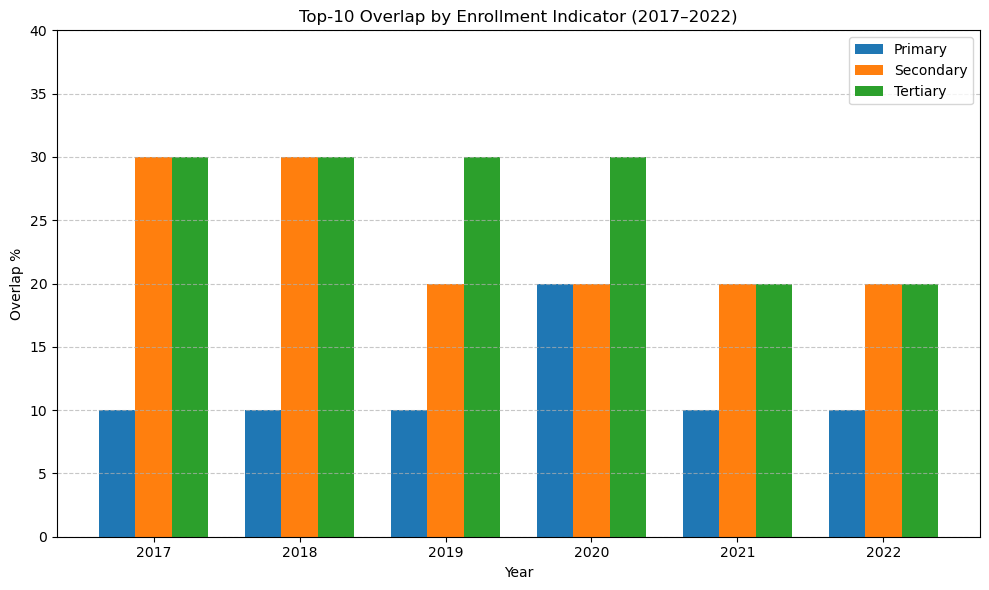

In [212]:
# --- Overlap data ---
data = {
    "Year": [2017, 2018, 2019, 2020, 2021, 2022],
    "Primary":   [10.0, 10.0, 10.0, 20.0, 10.0, 10.0],
    "Secondary": [30.0, 30.0, 20.0, 20.0, 20.0, 20.0],
    "Tertiary":  [30.0, 30.0, 30.0, 30.0, 20.0, 20.0]
}

df = pd.DataFrame(data)

# --- Plot ---
plt.figure(figsize=(10, 6))
bar_width = 0.25
x = range(len(df["Year"]))

plt.bar([p - bar_width for p in x], df["Primary"], width=bar_width, label="Primary")
plt.bar(x, df["Secondary"], width=bar_width, label="Secondary")
plt.bar([p + bar_width for p in x], df["Tertiary"], width=bar_width, label="Tertiary")

# --- Styling ---
plt.xticks(x, df["Year"])
plt.ylabel("Overlap %")
plt.xlabel("Year")
plt.title("Top-10 Overlap by Enrollment Indicator (2017–2022)")
plt.ylim(0, 40)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

## Correlation Analysis

#### Overview Compute and visualize: Pearson & Spearman correlation between:

Heatmaps of correlation matrix

Optional: Scatter plots with regression line (GDP vs Score)

Key Analyses & Visuals Distribution of Country Rankings

Histogram of average ranks across countries. Boxplots grouped by income level or region. Correlation Heatmap

Pearson correlations between:Average QS rank GDP per capita Literacy rate R&D expenditure

Time Series Trends

Line plots for selected countries showing:

Rank trend (2017–2022) GDP/literacy/R&D over time

Top & Bottom Performers Table or bar plot of top 10 and bottom 10 countries by average rank.

Scatterplots GDP vs. rank, Literacy vs. rank, R&D vs. rank

Add regression line and confidence interval.

Interpretation Example: "Countries with higher GDP and R&D spending generally show stronger average university rankings. However, outliers exist, suggesting that other factors (e.g., education policy, culture) may also influence rank."

### Economic Indicators

#### GDP

In [216]:
# Merge GDP with ranking stats
merged_df = pd.merge(gdp_pc_long, total_score_df, on=["country", "year"])

# Final columns: country, year, gdp_per_capita, score, university_count
merged_df.head(5)

,country,gdp_per_capita,year,total_score
0,Argentina,14532.500931,2017,65.8
1,Australia,53901.714539,2017,884.1
2,Austria,47163.742578,2017,139.0
3,Belgium,44035.323936,2017,318.7
4,Brazil,10080.509282,2017,107.0


#### Goverment Expenditures on Edu

#### Goverment Effectivness

In [218]:
# Merge GDP with ranking stats
merged_df_edu = pd.merge(edu_long, total_score_df, on=["country", "year"])

# Final columns: country, year, gdp_per_capita, score, university_count
merged_df_edu.head(5)

,country,gov_edu_exp,year,total_score
0,Argentina,5.454320,2017,65.8
1,Australia,5.321256,2017,884.1
2,Austria,5.371590,2017,139.0
3,Belgium,6.425340,2017,318.7
4,Brazil,6.320480,2017,107.0


In [220]:
# Merge Gov effectivness with ranking stats
merged_df_gov = pd.merge(gov_pct_long, total_score_df, on=["country", "year"])

# Final columns: country, year, gdp_per_capita, score, university_count
merged_df_gov.head(5)

,country,gov_effectiveness,year,total_score
0,Argentina,58.571430,2017,65.8
1,Australia,91.428574,2017,884.1
2,Austria,90.952377,2017,139.0
3,Belgium,85.714287,2017,318.7
4,Brazil,40.000000,2017,107.0


#### Research and Development 

In [232]:
merged_rd = pd.merge(res_long, total_score_df, on=["country", "year"],
    how="inner"
)
# Final columns: country, year, gdp_per_capita, score, university_count
merged_rd.head(5)

,country,rd_exp_gdp,year,total_score
0,Argentina,0.55631,2017,65.8
1,Australia,1.87919,2017,884.1
2,Austria,3.05656,2017,139.0
3,Belgium,2.66666,2017,318.7
4,Brazil,1.11750,2017,107.0


### Correlation Analysis - Pyhton code

In [234]:
def correlation_analysis(df, target_col, predictor_col, title):
    """
    Compute Pearson, Spearman, and Kendall correlations 
    between target_col and predictor_col in df.
    """
    # Ensure numeric
    df[target_col] = pd.to_numeric(df[target_col], errors='coerce')
    df[predictor_col] = pd.to_numeric(df[predictor_col], errors='coerce')
    
    # Drop missing rows
    corr_df = df.dropna(subset=[target_col, predictor_col])
    
    # Calculate correlations
    pearson_corr, pearson_p = pearsonr(corr_df[target_col], corr_df[predictor_col])
    spearman_corr, spearman_p = spearmanr(corr_df[target_col], corr_df[predictor_col])
    kendall_corr, kendall_p = kendalltau(corr_df[target_col], corr_df[predictor_col])
    
    # Print results
    print(f"=== Correlation with {title} ===")
    print(f"Pearson:  r = {pearson_corr:.4f}, p = {pearson_p:.4g}")
    print(f"Spearman: rho = {spearman_corr:.4f}, p = {spearman_p:.4g}")
    print(f"Kendall:  tau = {kendall_corr:.4f}, p = {kendall_p:.4g}")
    print()

# Example usage:
correlation_analysis(merged_df, 'total_score', 'gdp_per_capita', 'GDP per Capita')
correlation_analysis(merged_df_edu, 'total_score', 'gov_exp_edu', 
                    'Government Expenditure on Education')
correlation_analysis(merged_df_gov, 'total_score', 'gov_effectiveness', 
                    'Government Effectiveness')
correlation_analysis(merged_rd, 'total_score', 'rd_exp_gdp', 'R&D Expenditure (% of GDP)')

=== Correlation with GDP per Capita ===
Pearson:  r = 0.3032, p = 4.89e-06
Spearman: rho = 0.5255, p = 6.023e-17
Kendall:  tau = 0.3746, p = 1.617e-16



KeyError: 'gov_exp_edu'

### Educational Indicators

In [ ]:
indicators = ["school_enrol_primary_pct", "school_enrol_secondary_pct", "school_enrol_tertiary_pct"]

results = []
for ind in indicators:
    pearson_r, pearson_p = pearsonr(merged_edu_ind[ind], merged_edu_ind["total_score"])
    spearman_r, spearman_p = spearmanr(merged_edu_ind[ind], merged_edu_ind["total_score"])
    kendall_r, kendall_p = kendalltau(merged_edu_ind[ind], merged_edu_ind["total_score"])
    
    results.append({
        "Indicator": ind,
        "Pearson_r": pearson_r, "Pearson_p": pearson_p,
        "Spearman_r": spearman_r, "Spearman_p": spearman_p,
        "Kendall_tau": kendall_r, "Kendall_p": kendall_p
    })

corr_df = pd.DataFrame(results)
print(corr_df)

### Visualizations

### Correlation Analysis Overview 

#### Economic Indicators vs. Total Score

| Indicator                                    | Pearson r (p)                   | Spearman ρ (p)                 | Kendall τ (p)                  | Interpretation               |
|----------------------------------------------|----------------------------------|---------------------------------|---------------------------------|--------------------------------|
| GDP per capita                               | 0.3032 (**4.89×10⁻⁶**)           | 0.5255 (**6.02×10⁻¹⁷**)         | 0.3746 (**1.62×10⁻¹⁶**)         | Moderate positive              |
| Gov. expenditure on education (% GDP)        | 0.1182 (0.0809)                  | 0.2294 (**0.0006235**)          | 0.1600 (**0.0004323**)          | Weak positive                  |
| Government effectiveness                     | 0.2974 (**7.53×10⁻⁶**)           | 0.5589 (**2.16×10⁻¹⁹**)         | 0.3668 (**8.11×10⁻¹⁶**)         | Moderate positive              |
| R&D expenditure (% GDP)                      | 0.3576 (**8.02×10⁻⁸**)           | 0.6235 (**2.43×10⁻²⁴**)         | 0.4143 (**2.51×10⁻¹⁹**)         | Moderate-to-strong positive    |

**Note:**  
- **Bold p-values** indicate statistical significance at p < 0.05.  
- Pearson measures *linear* relationships, Spearman measures *monotonic* relationships, and Kendall measures *rank concordance*.  


#### Educational Indicators vs. Total Score

| Indicator                     | Pearson r (p)                | Spearman ρ (p)                 | Kendall τ (p)                 | Interpretation               |
|--------------------------------|------------------------------|---------------------------------|--------------------------------|--------------------------------|
| Primary school enrollment (%)  | -0.0166 (0.8076)              | 0.0252 (0.7108)                 | 0.0206 (0.6506)                | No correlation                 |
| Secondary school enrollment (%)| 0.0465 (0.4939)               | 0.2423 (**2.96×10⁻⁴**)          | 0.1446 (**0.001454**)          | Weak positive                   |
| Tertiary school enrollment (%) | 0.2161 (**0.001294**)         | 0.3516 (**9.01×10⁻⁸**)          | 0.2167 (**2×10⁻⁶**)            | Moderate positive               |

**Note:**  
- **Bold p-values** indicate statistical significance at p < 0.05.  
- Pearson measures *linear* relationships, Spearman measures *monotonic* relationships, and Kendall measures *rank concordance*.  

#### Discussion - Correlations Analysis with Total Score

The correlation analysis reveals consistent and statistically significant relationships between certain economic and educational indicators and the total score of countries in the QS World University Rankings.

**Economic indicators** show that GDP per capita, government effectiveness, and R&D expenditure (% of GDP) all have moderate positive correlations with total score across all three statistical measures (Pearson, Spearman, Kendall). Notably, R&D expenditure exhibits the strongest association (Pearson r = 0.358, Spearman ρ = 0.624, Kendall τ = 0.414), suggesting that higher investment in research and development aligns strongly with better university rankings. Government expenditure on education (% of GDP) shows weaker correlations, with only the rank-based measures (Spearman and Kendall) reaching statistical significance, indicating that the magnitude of spending alone may not capture the quality or efficiency of investment. 
Countries with higher GDP and R&D spending generally show stronger average university rankings. However, outliers exist, suggesting that other factors (e.g., education policy, culture) may also influence rank.

**Educational indicators** present a more varied pattern. Primary school enrollment shows no significant correlation with total score, which is expected given its near-universal levels across countries. Secondary school enrollment has a weak but significant positive association in rank-based measures, while tertiary school enrollment stands out with moderate, significant correlations in all three methods (Pearson r = 0.216, Spearman ρ = 0.352, Kendall τ = 0.217). This suggests that greater participation in higher education is meaningfully linked to stronger university performance at the national level.

Overall, the findings highlight that while economic capacity and institutional effectiveness are important, the most relevant educational factor for university rankings is the proportion of the population engaged in tertiary education, supported by targeted research and development investment.

## Limitations and Sensitivity Analysis
Acknowledge:

Data gaps (missing GDP or score values)

Different educational systems

Assumption of linearity

Sensitivity:

Simulate ±10% change in GDP → observe score impact via ARIMAX

## Overall Analysis 

## What is next?

### Multiple regression Analysis

Extends single regression by including two or more independent variables to explain a dependent variable.

## Conclusion 

Summary of Findings Economic and educational indicators have strong predictive power for national-level university rankings.

GDP per capita and R&D spending were the most influential variables.

ARIMAX and Monte Carlo performed best overall, balancing accuracy and interpretability.

Limitations Rankings are partly subjective and may not fully reflect educational quality.

External factors (e.g., geopolitical shifts, funding cuts, pandemic effects) are not modeled.

Data availability and consistency varied by country.

Future Work Include more indicators: internet access, tertiary enrollment rate, faculty-to-student ratio.

Expand to university-level forecasting (not just country-level).

Deploy an interactive dashboard or app to visualize predictions dynamically. 

Summarize key findings:

Which models performed best?

Does GDP help?

Implications for policy or further study

Future improvements:

Use additional indicators (e.g., literacy, R&D)

Include university-specific features

## Acknowledgements and References

Special thanks:
- to padhmam for the QS World University Rankings (2017–2022) dataset.
Link: https://www.kaggle.com/datasets/padhmam/qs-world-university-rankings-2017-2022
- bushraqurban for Gross enrolment: Primary, Secondary, Tertiary (%) - “World Education Dataset” 
Link: https://www.kaggle.com/datasets/bushraqurban/world-education-dataset


Agasisti, T., & Bertoletti, A. (2022). Evaluating the influence of country characteristics on the Higher Education System Rankings’ performance. Studies in Higher Education, 47(9), 1774–1790. https:

Benito, M., Gil, P., Romera, R., & Urquía-Grande, E. (2019). Funding, is it key for standing out in the university rankings? Scientometrics, 121(2), 771–792. https:

Gadd, E. (2021). In praise of rankers: Taking the long view on university rankings. Insights, 34(1), 19. https:

Guo, C. (2023). The effect of higher education initiatives on university rankings: Evidence from global panel data. Humanities and Social Sciences Communications, 10, 127. https://doi.org/10.1057/s41599-023-02034-w

Günay, A. (2022). Economic indicators and global university rankings: A comparative analysis. Journal of Higher Education Policy and Management, 44(6), 579–593. https://dergipark.org.tr/tr/download/article-file/2542024

Kaufmann, D., Kraay, A., & Mastruzzi, M. (2011). The Worldwide Governance Indicators: Methodology and analytical issues. Hague Journal on the Rule of Law, 3(2), 220–246. https://doi.org/10.1017/S1876404511200046

Lu, C. T. K. (2014). World-class universities and GDP per capita: Is there a relationship? Munich Personal RePEc Archive. https://mpra.ub.uni-muenchen.de/53900/

Meo, S. A., Usmani, A. M., Vohra, M. S., & Bukhari, I. A. (2013). Impact of GDP, spending on R&D, number of universities and scientific journals on research publications among Asian countries. PLoS ONE, 8(6), e66449. https://doi.org/10.1371/journal.pone.0066449

Moed, H. F. (2016). A critical comparative analysis of five world university rankings. Scientometrics, 110(2), 967–990. https://doi.org/10.1007/s11192-016-2212-y

Pietrucha, J. (2018). Country-specific determinants of world university rankings. Scientometrics, 114(3), 1129–1139. https://doi.org/10.1007/s11192-017-2628-9

Prathap, G. (2014). The size of higher education, R&D expenditure, academic documents and international rankings. Current Science, 106(4), 518–520. https://doi.org/10.18520/cs/v106/i4/518-520

Selten, F., Neylon, C., Huang, C. K., & Groth, P. (2019). A longitudinal analysis of university rankings. arXiv preprint arXiv:1908.10632. https://arxiv.org/abs/1908.10632

Telias, D. (2014). The contribution of university rankings to country’s GDP per capita. Munich Personal RePEc Archive. https://mpra.ub.uni-muenchen.de/56057/

Whetsell, T. A., Cao, X., Kroll, A., & Grossardt, T. (2019). The influence of governance on scientific performance: A cross-national study. arXiv preprint arXiv:1909.04468. https://arxiv.org/abs/1909.04468